# Cleaning and Feature Engineering

In [1704]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import copy

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1705]:
def get_unique_values(df):
    for i in df.columns:
        print(i,set(np.unique(df[i])),'\n')
        
def type_(x):
    if len(x) == 0:
        t = 'Numerical'
    elif len(x) == 2:
        t = 'Binary Categorical'
    else:
        t = 'Categorical' 
    return t


################################################################# Data Dictionary For Housing Data


housing_dict = pd.read_csv('./data/data_description.txt',
                   sep="\n|:",
                   header=None,
                   engine='python')

housing_dict.columns = ['var','descr']

new_housing_dict = housing_dict.loc[~housing_dict['descr'].isnull()]

new_housing_dict.loc[0:,'index_'] = new_housing_dict.index

idx = new_housing_dict['index_'].to_numpy()
i = 0
indx_outcomes = []
while (i < len(idx)-1):
    indx_outcomes.append(np.arange(idx[i]+1,idx[i+1]))
    i += 1

associated_outcomes = []
for j in indx_outcomes:
    associated_outcomes.append(housing_dict[['var']].loc[j].to_numpy())
    
associated_outcomes.append(np.array([])) #append an empty array to fix length issue

associated_outcomes = pd.Series(associated_outcomes).\
                        apply(lambda outcome_set: [i[0] for i in outcome_set]).to_numpy()



new_housing_dict.loc[0:,'associated_outcomes'] = associated_outcomes
new_housing_dict = new_housing_dict.reset_index()
new_housing_dict = new_housing_dict.drop(['index','index_'], axis = 1)


types = [type_(elem) for elem in new_housing_dict['associated_outcomes']]
new_housing_dict.loc[0:,'Variable Type'] = types

housing_dict = new_housing_dict

def ghd():
    return(housing_dict.sort_values(by = "var"))

# Reading in Housing Data

In [1706]:
housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv')
housing.rename(columns = {'PID':'MapRefNo'}, inplace = True) # renaming to later merge res and housing on this column
housing = housing.drop('Unnamed: 0', axis = 1)
housing.shape

(2580, 81)

In [1707]:
housing.head()

,MapRefNo,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


# Reading in Real Estate Data

In [1708]:
res = pd.read_csv('./data/Ames_Real_Estate_Data.csv')
res.shape

dd_res = pd.read_excel('./data/Tbl_DataExportSpec.xls')
dd_res.shape

(100, 7)

## **Note: res columns (36,40,81,87) have mixed data types**

# Dealing with Nulls

In [1788]:
data = housing.copy()

nan_counts = pd.DataFrame(data.isnull().sum()).T
nan_counts

,MapRefNo,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,0,0,0,462,0,0,2412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,14,0,0,0,69,69,71,69,1,70,1,1,1,0,0,0,1,0,0,0,2,2,0,0,0,0,0,0,0,0,1241,127,129,129,1,1,129,129,0,0,0,0,0,0,0,2571,2055,2483,0,0,0,0,0


In [1789]:
high_null_cols = ["Alley", "FireplaceQu", "PoolQC",
                  "Fence", "MiscFeature"] # columns with too many nulls

data = data.drop(high_null_cols,axis = 1)


nan_counts = pd.DataFrame(data.isnull().sum()).T
nan_counts = nan_counts.iloc[:,[i for i,j in enumerate(nan_counts.loc[0].to_list()) if j != 0]]

nan_counts

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,462,14,14,69,69,71,69,1,70,1,1,1,1,2,2,127,129,129,1,1,129,129


In [1790]:
data = data.drop('LotFrontage',axis = 1)

### Rows in train and test sets that could contain a null

In [1791]:
len(data.loc[data.isna().any(axis = 1)]),len(data)

(204, 2580)

### Not that many rows contain nulls is either set so we'll just drop them for simplicity 

In [1792]:
data_nulls = data.loc[data.isna().any(axis = 1)]
print(data_nulls.index)
data = data.drop(data_nulls.index,axis = 0)
data.loc[data.isna().any(axis = 1)]

Int64Index([   5,   17,   22,   44,   48,   50,   54,   60,   93,   96,
            ...
            2464, 2465, 2477, 2481, 2488, 2513, 2536, 2540, 2546, 2576],
           dtype='int64', length=204)


,MapRefNo,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


# Categoricals

In [1793]:
dc = ghd()
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]

[s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]],[4,3,2,1,0]))
print(set(data.loc[:,'BsmtExposure']))
print(im)
data.loc[:,'BsmtExposure'] = data['BsmtExposure'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtExposure']))

data.loc[:,'BsmtExposure'].value_counts().to_dict()

{'Mn', 'Av', 'Gd', 'No'}
{'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
{1, 2, 3, 4}


{1: 1603, 3: 329, 4: 236, 2: 208}

In [1794]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,2]

im = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
print(set(data.loc[:,'BsmtCond']))
data.loc[:,'BsmtCond'] = data['BsmtCond'].apply(lambda x:im[x])
print(im)
print(set(data.loc[:,'BsmtCond']))

{'Fa', 'Ex', 'Gd', 'TA'}
{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
{2, 3, 4, 5}


In [1795]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,2]],[6,5,4,3,2,1,0]))
print(set(data.loc[:,'BsmtFinType1']))
print(im)
data.loc[:,'BsmtFinType1'] = data['BsmtFinType1'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtFinType1']))

{'BLQ', 'ALQ', 'GLQ', 'Rec', 'Unf', 'LwQ'}
{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
{1, 2, 3, 4, 5, 6}


In [1796]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,2]],[6,5,4,3,2,1,0]))
print(set(data.loc[:,'BsmtFinType2']))
print(im)
data.loc[:,'BsmtFinType2'] = data['BsmtFinType2'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtFinType2']))

{'BLQ', 'ALQ', 'GLQ', 'Rec', 'Unf', 'LwQ'}
{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
{1, 2, 3, 4, 5, 6}


In [1797]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,2]],[5,4,3,2,1,0]))
print(set(data.loc[:,'BsmtQual']))
print(im)
data.loc[:,'BsmtQual'] = data['BsmtQual'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtQual']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
{1, 2, 3, 4, 5}


In [1798]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,2]],[0,1]))
print(set(data.loc[:,'CentralAir']))
print(im)
data.loc[:,'CentralAir'] = data['CentralAir'].apply(lambda x:im[x])
print(set(data.loc[:,'CentralAir']))

{'N', 'Y'}
{'N': 0, 'Y': 1}
{0, 1}


In [1799]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,2]],[5,4,3,2,1]))
print(set(data.loc[:,'ExterCond']))
print(im)
data.loc[:,'ExterCond'] = data['ExterCond'].apply(lambda x:im[x])
print(set(data.loc[:,'ExterCond']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
{1, 2, 3, 4, 5}


In [1800]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,2]],[5,4,3,2,1]))
print(set(data.loc[:,'ExterQual']))
print(im)
data.loc[:,'ExterQual'] = data['ExterQual'].apply(lambda x:im[x])
print(set(data.loc[:,'ExterQual']))

{'Fa', 'Ex', 'Gd', 'TA'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
{2, 3, 4, 5}


In [1801]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,2]],[8,7,6,5,4,3,2,1]))
print(set(data.loc[:,'Functional']))
print(im)
data.loc[:,'Functional'] = data['Functional'].apply(lambda x:im[x])
print(set(data.loc[:,'Functional']))

{'Min2', 'Maj2', 'Min1', 'Sal', 'Maj1', 'Typ', 'Mod'}
{'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
{1, 3, 4, 5, 6, 7, 8}


In [1802]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,2]],[5,4,3,2,1,0]))
print(set(data.loc[:,'GarageCond']))
print(im)
data.loc[:,'GarageCond'] = data['GarageCond'].apply(lambda x:im[x])
print(set(data.loc[:,'GarageCond']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
{1, 2, 3, 4, 5}


In [1803]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,2]],[3,2,1,0]))
print(set(data.loc[:,'GarageFinish']))
print(im)
data.loc[:,'GarageFinish'] = data['GarageFinish'].apply(lambda x:im[x])
print(set(data.loc[:,'GarageFinish']))

{'Unf', 'Fin', 'RFn'}
{'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
{1, 2, 3}


In [1804]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,2]],[5,4,3,2,1,0]))
print(set(data.loc[:,'GarageQual']))
print(im)
data.loc[:,'GarageQual'] = data['GarageQual'].apply(lambda x:im[x])
print(set(data.loc[:,'GarageQual']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
{1, 2, 3, 4, 5}


In [1805]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,2]],[5,4,3,2,1]))
print(set(data.loc[:,'KitchenQual']))
print(im)
data.loc[:,'KitchenQual'] = data['KitchenQual'].apply(lambda x:im[x])
print(set(data.loc[:,'KitchenQual']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
{1, 2, 3, 4, 5}


In [1806]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,2]],[1,2,3]))
print(set(data.loc[:,'LandSlope']))
print(im)
data.loc[:,'LandSlope'] = data['LandSlope'].apply(lambda x:im[x])
print(set(data.loc[:,'LandSlope']))

{'Sev', 'Mod', 'Gtl'}
{'Gtl': 1, 'Mod': 2, 'Sev': 3}
{1, 2, 3}


In [1807]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,2]],[0,1,2,3]))
print(set(data.loc[:,'LotShape']))
print(im)
data.loc[:,'LotShape'] = data['LotShape'].apply(lambda x:im[x])
print(set(data.loc[:,'LotShape']))

{'IR2', 'IR3', 'IR1', 'Reg'}
{'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
{0, 1, 2, 3}


In [1808]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,0]

'MSSubClass'

In [1809]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,1]

' Identifies the type of dwelling involved in the sale.'

In [1810]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]

['20    1-STORY 1946 & NEWER ALL STYLES',
 '30    1-STORY 1945 & OLDER',
 '40    1-STORY W/FINISHED ATTIC ALL AGES',
 '45    1-1/2 STORY - UNFINISHED ALL AGES',
 '50    1-1/2 STORY FINISHED ALL AGES',
 '60    2-STORY 1946 & NEWER',
 '70    2-STORY 1945 & OLDER',
 '75    2-1/2 STORY ALL AGES',
 '80    SPLIT OR MULTI-LEVEL',
 '85    SPLIT FOYER',
 '90    DUPLEX - ALL STYLES AND AGES',
 '120    1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 '150    1-1/2 STORY PUD - ALL AGES',
 '160    2-STORY PUD - 1946 & NEWER',
 '180    PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 '190    2 FAMILY CONVERSION - ALL STYLES AND AGES']

In [1811]:
desc = dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]
desc = [i[i.find('    '):].strip() for i in desc]
print(desc)
im = dict(zip([int(s[0:s.find(' ')]) for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]],desc))
print(set(data.loc[:,'MSSubClass']))
print(im)
data.loc[:,'MSSubClass'] = data['MSSubClass'].apply(lambda x:im[x])
print(set(data.loc[:,'MSSubClass']))

['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES', '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER', '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL', 'SPLIT FOYER', 'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '1-1/2 STORY PUD - ALL AGES', '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES']
{160, 70, 40, 75, 45, 190, 80, 50, 20, 180, 85, 150, 120, 90, 60, 30}
{20: '1-STORY 1946 & NEWER ALL STYLES', 30: '1-STORY 1945 & OLDER', 40: '1-STORY W/FINISHED ATTIC ALL AGES', 45: '1-1/2 STORY - UNFINISHED ALL AGES', 50: '1-1/2 STORY FINISHED ALL AGES', 60: '2-STORY 1946 & NEWER', 70: '2-STORY 1945 & OLDER', 75: '2-1/2 STORY ALL AGES', 80: 'SPLIT OR MULTI-LEVEL', 85: 'SPLIT FOYER', 90: 'DUPLEX - ALL STYLES AND AGES', 120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',

In [1812]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[24,0]

'HeatingQC'

In [1813]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[24,1]

' Heating quality and condition'

In [1814]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[24,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Average/Typical',
 'Fa     Fair',
 'Po     Poor']

In [1815]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[24,2]],[5,4,3,2,1]))
print(set(data.loc[:,'HeatingQC']))
print(im)
data.loc[:,'HeatingQC'] = data['HeatingQC'].apply(lambda x:im[x])
print(set(data.loc[:,'HeatingQC']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
{1, 2, 3, 4, 5}


# **Making Dummy Variables**

In [1816]:
dumb_data = pd.get_dummies(data.drop(['Street','Condition2','SaleType','SaleCondition'],axis = 1))
dumb_data = pd.merge(dumb_data,data[['MapRefNo','Neighborhood']],on = 'MapRefNo') #getting the original Neighborhood Column Back
second_column = dumb_data.pop('Neighborhood')
dumb_data.insert(1, 'Neighborhood', second_column) # changing position of Neighborhood column

In [1817]:
list(enumerate(dumb_data.columns))

[(0, 'MapRefNo'),
 (1, 'Neighborhood'),
 (2, 'GrLivArea'),
 (3, 'SalePrice'),
 (4, 'LotArea'),
 (5, 'LotShape'),
 (6, 'LandSlope'),
 (7, 'OverallQual'),
 (8, 'OverallCond'),
 (9, 'YearBuilt'),
 (10, 'YearRemodAdd'),
 (11, 'MasVnrArea'),
 (12, 'ExterQual'),
 (13, 'ExterCond'),
 (14, 'BsmtQual'),
 (15, 'BsmtCond'),
 (16, 'BsmtExposure'),
 (17, 'BsmtFinType1'),
 (18, 'BsmtFinSF1'),
 (19, 'BsmtFinType2'),
 (20, 'BsmtFinSF2'),
 (21, 'BsmtUnfSF'),
 (22, 'TotalBsmtSF'),
 (23, 'HeatingQC'),
 (24, 'CentralAir'),
 (25, '1stFlrSF'),
 (26, '2ndFlrSF'),
 (27, 'LowQualFinSF'),
 (28, 'BsmtFullBath'),
 (29, 'BsmtHalfBath'),
 (30, 'FullBath'),
 (31, 'HalfBath'),
 (32, 'BedroomAbvGr'),
 (33, 'KitchenAbvGr'),
 (34, 'KitchenQual'),
 (35, 'TotRmsAbvGrd'),
 (36, 'Functional'),
 (37, 'Fireplaces'),
 (38, 'GarageYrBlt'),
 (39, 'GarageFinish'),
 (40, 'GarageCars'),
 (41, 'GarageArea'),
 (42, 'GarageQual'),
 (43, 'GarageCond'),
 (44, 'WoodDeckSF'),
 (45, 'OpenPorchSF'),
 (46, 'EnclosedPorch'),
 (47, '3SsnPorch'

In [1818]:
dummy_cats = []
MSSubClass_cats = list(dumb_data.columns[53:69])
dummy_cats.append(MSSubClass_cats)
MSZoning_cats = list(dumb_data.columns[69:75])
dummy_cats.append(MSZoning_cats)
LandContour_cats = list(dumb_data.columns[75:79])
dummy_cats.append(LandContour_cats)
Utilities_cats = list(dumb_data.columns[79:81])
dummy_cats.append(Utilities_cats)
LotConfig_cats = list(dumb_data.columns[81:86])
dummy_cats.append(LotConfig_cats)
Neighborhood_cats = list(dumb_data.columns[86:114])
dummy_cats.append(Neighborhood_cats)
Condition1_cats = list(dumb_data.columns[114:123])
dummy_cats.append(Condition1_cats)
Condition2_cats = list(dumb_data.columns[125:133])
dummy_cats.append(Condition2_cats)
BldgType_cats = list(dumb_data.columns[133:138])
dummy_cats.append(BldgType_cats)
HouseStyle_cats = list(dumb_data.columns[138:146])
dummy_cats.append(HouseStyle_cats)
RoofStyle_cats = list(dumb_data.columns[146:152])
dummy_cats.append(RoofStyle_cats)
RoofMatl_cats = list(dumb_data.columns[152:159])
dummy_cats.append(RoofMatl_cats)
Exterior1st_cats = list(dumb_data.columns[159:172])
dummy_cats.append(Exterior1st_cats)
Exterior2nd_cats = list(dumb_data.columns[172:187])
dummy_cats.append(Exterior2nd_cats)
MasVnrType_cats = list(dumb_data.columns[187:191])
dummy_cats.append(MasVnrType_cats)
Foundation_cats = list(dumb_data.columns[191:196])
dummy_cats.append(Foundation_cats)
Heating_cats = list(dumb_data.columns[196:200])
dummy_cats.append(Heating_cats)
Electrical_cats = list(dumb_data.columns[200:204])
dummy_cats.append(Electrical_cats)
GarageType_cats = list(dumb_data.columns[204:210])
dummy_cats.append(GarageType_cats)
PavedDrive_cats = list(dumb_data.columns[210:213])
dummy_cats.append(PavedDrive_cats)

In [1820]:
PavedDrive_cats

[]

In [1819]:
dummy_cats

[['MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES',
  'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
  'MSSubClass_1-1/2 STORY PUD - ALL AGES',
  'MSSubClass_1-STORY 1945 & OLDER',
  'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
  'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
  'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
  'MSSubClass_2-1/2 STORY ALL AGES',
  'MSSubClass_2-STORY 1945 & OLDER',
  'MSSubClass_2-STORY 1946 & NEWER',
  'MSSubClass_2-STORY PUD - 1946 & NEWER',
  'MSSubClass_DUPLEX - ALL STYLES AND AGES',
  'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
  'MSSubClass_SPLIT FOYER',
  'MSSubClass_SPLIT OR MULTI-LEVEL'],
 ['MSZoning_C (all)',
  'MSZoning_FV',
  'MSZoning_I (all)',
  'MSZoning_RH',
  'MSZoning_RL',
  'MSZoning_RM'],
 ['LandContour_Bnk', 'LandContour_HLS'],
 ['LandContour_Low',
  'LandContour_Lvl',
  'Utilities_AllPub',
  'Utilities_NoSewr'],
 ['LotConfig_Corner', 'LotConfig_Cul

In [1747]:
def box_maykr(df,column_list,target_var,figsize):
    
    """
    function to make consecutive boxplots
    
    column list: list of dataframe columns in df to plot
    target_var: target variable in df to plot against 
    figsize: tuple to define the size of the figure
    
    """

    fig,axs = plt.subplots(int(np.ceil(len(column_list)/2)),2,figsize = figsize)
    plt.subplots_adjust(right = 1.5,top = 5)
    axs = axs.flatten()
    print('_'*125)
    print('_'*125)
    print(' '*50,column_list[0][:column_list[0].find('_')])
    print('_'*125)
    print('_'*125)
    for i, col in enumerate(column_list):
        sns.boxplot(x=col,y = target_var,ax=axs[i],data=df)
        axs[i].set_ylabel(f'{target_var}')
        axs[i].set_xlabel(f'{col}')
        axs[i].set_title(f'{target_var}  vs. {col}')
        print(df[col].value_counts())

    
    plt.show()   
    
fig_sizes = [(10,8),(10,4),(10,1),(10,2),(10,1),(10,4),
             (10,18),(10,6),(10,6),(10,4),(10,4),
             (10,4),(10,4),(10,8),(10,8),(10,2),
             (10,4),(10,4),(10,2),(10,4),(10,2),(10,6),(10,4)]

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   MSSubClass
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2364
1      14
Name: MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES, dtype: int64
0    2139
1     239
Name: MSSubClass_1-1/2 STORY FINISHED ALL AGES, dtype: int64
0    2377
1       1
Name: MSSubClass_1-1/2 STORY PUD - ALL AGES, dtype: int64
0    2285
1      93
Name: MSSubClass_1-STORY 1945 & OLDER, dtype: int64
0    1498
1     880
Name: MSSubClass_1-STORY 1946 & NEWER ALL STYLES, dtype: int64
0    2211
1     167
Name: MSSubClas

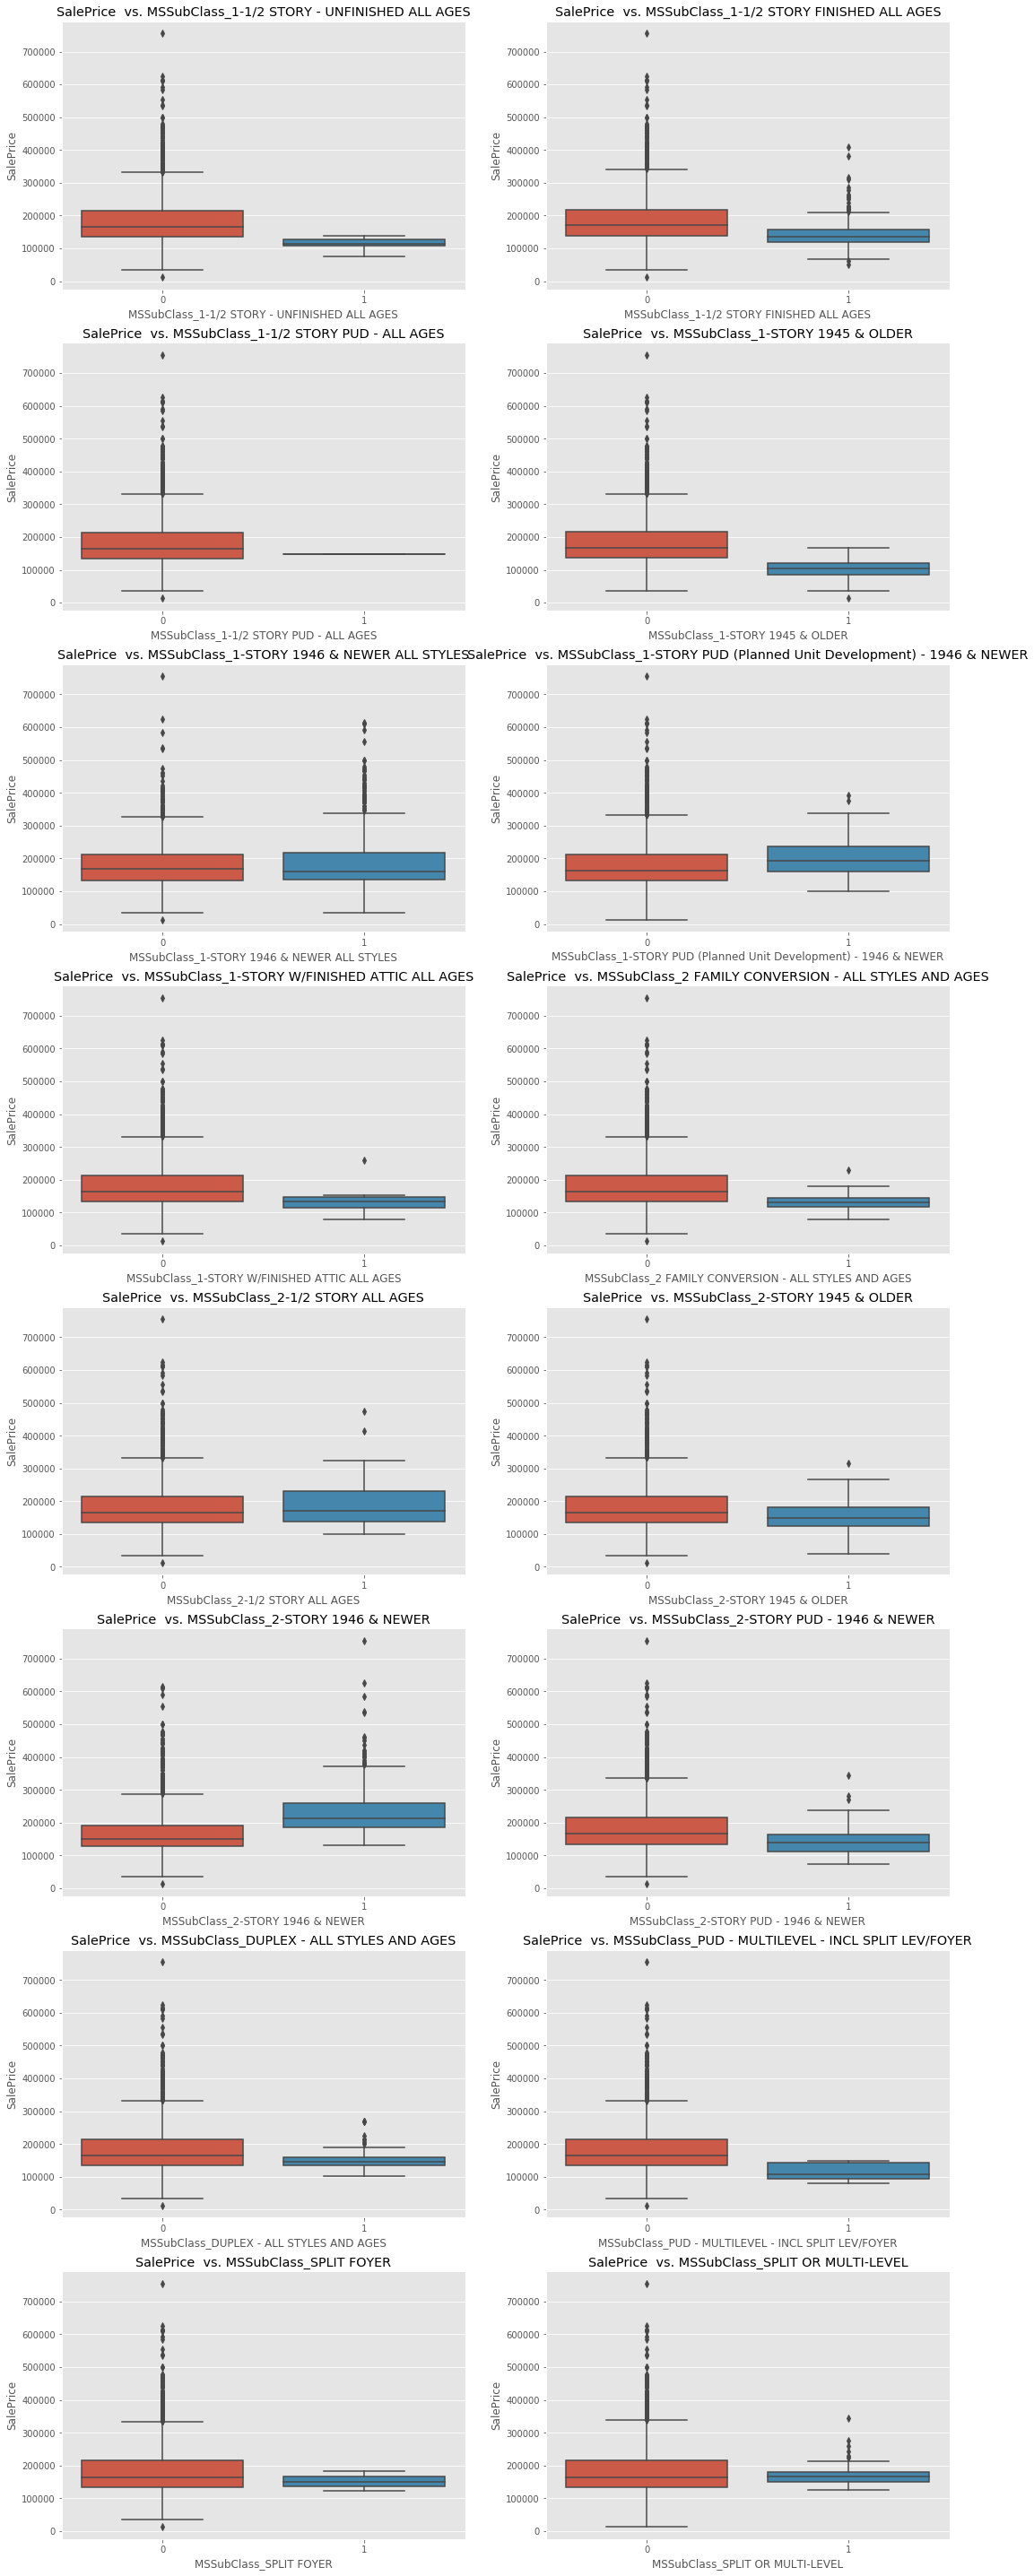

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   MSZoning
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2367
1      11
Name: MSZoning_C (all), dtype: int64
0    2269
1     109
Name: MSZoning_FV, dtype: int64
0    2377
1       1
Name: MSZoning_I (all), dtype: int64
0    2361
1      17
Name: MSZoning_RH, dtype: int64
1    1876
0     502
Name: MSZoning_RL, dtype: int64
0    2014
1     364
Name: MSZoning_RM, dtype: int64


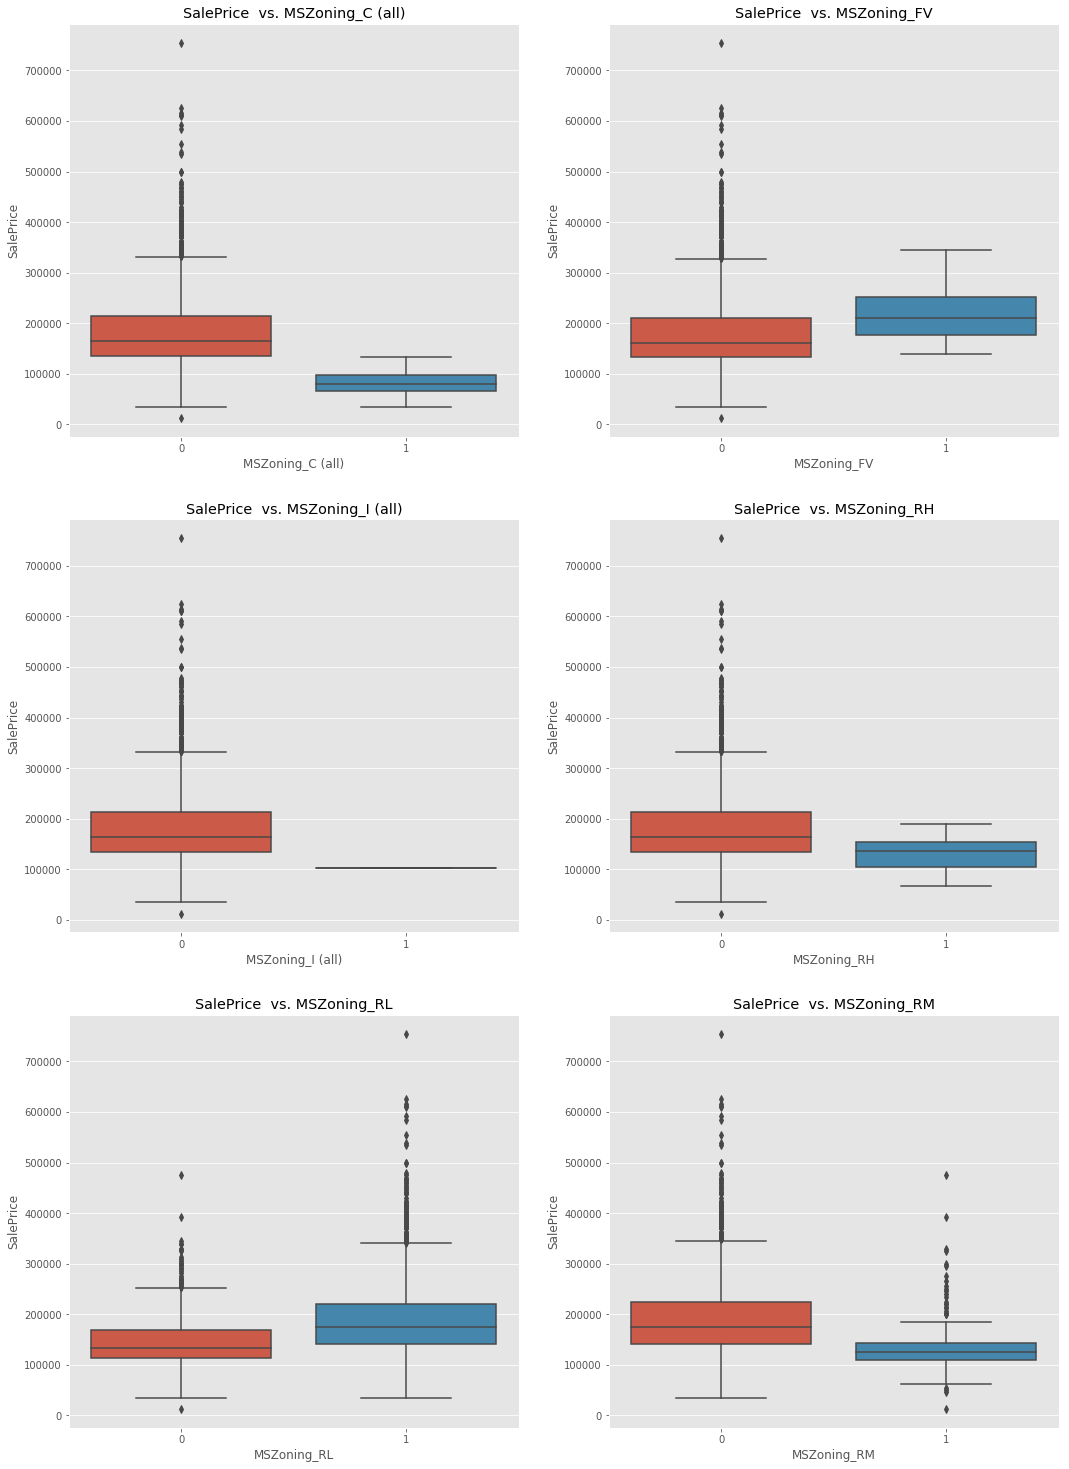

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Street
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2371
1       7
Name: Street_Grvl, dtype: int64
1    2371
0       7
Name: Street_Pave, dtype: int64


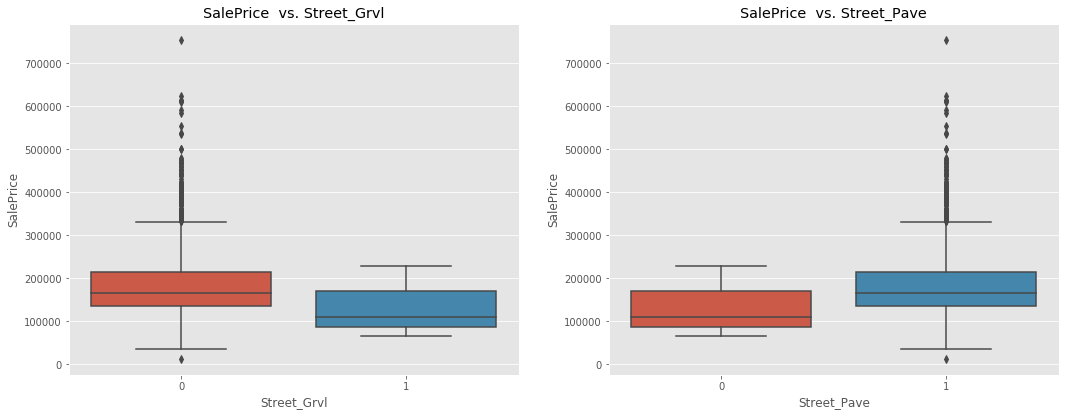

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   LandContour
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2292
1      86
Name: LandContour_Bnk, dtype: int64
0    2284
1      94
Name: LandContour_HLS, dtype: int64
0    2330
1      48
Name: LandContour_Low, dtype: int64
1    2150
0     228
Name: LandContour_Lvl, dtype: int64


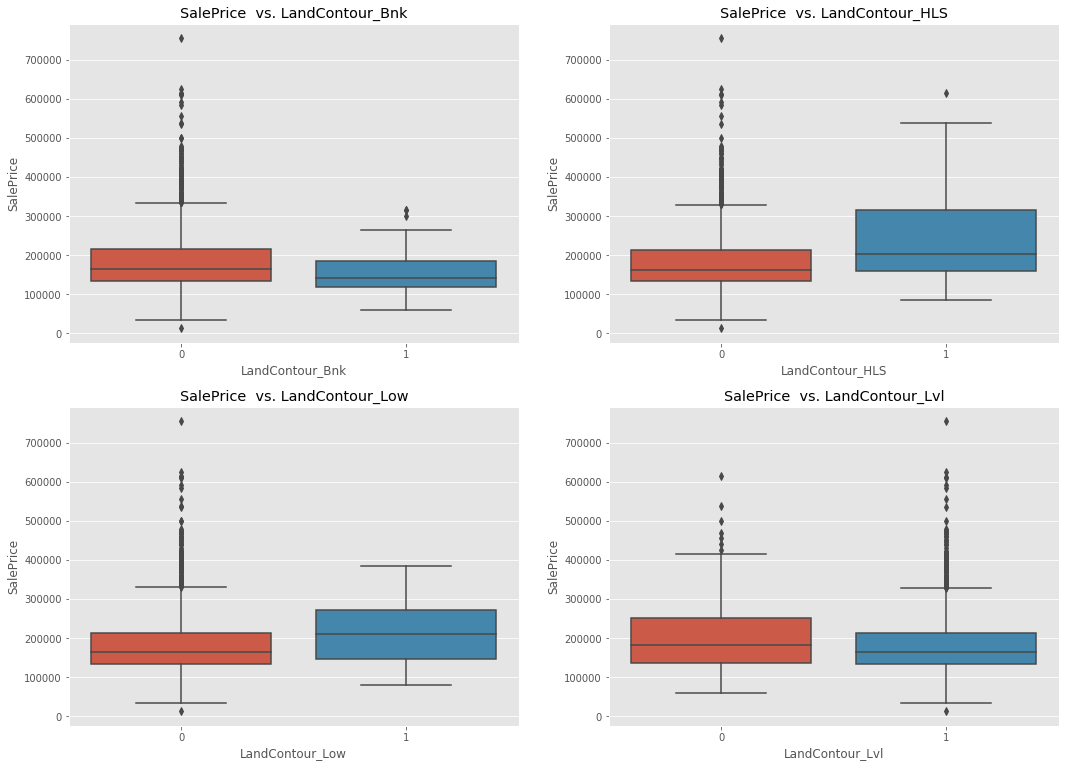

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Utilities
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
1    2377
0       1
Name: Utilities_AllPub, dtype: int64
0    2377
1       1
Name: Utilities_NoSewr, dtype: int64


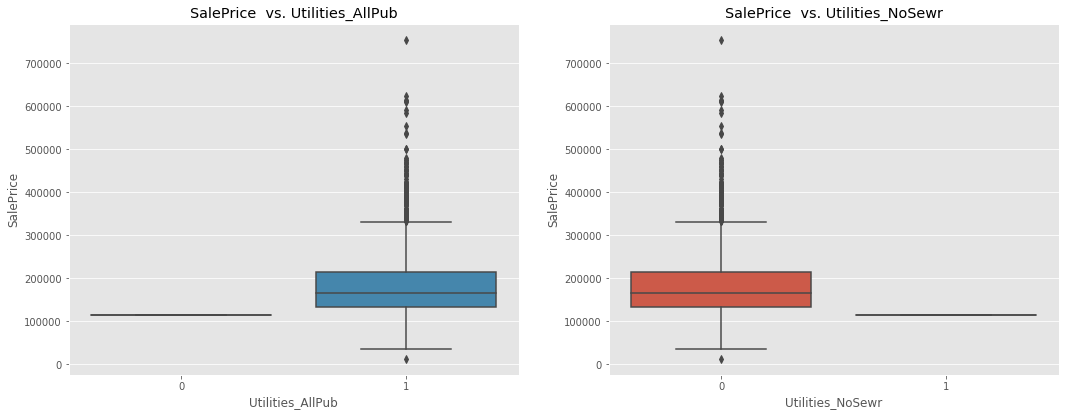

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   LotConfig
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    1972
1     406
Name: LotConfig_Corner, dtype: int64
0    2221
1     157
Name: LotConfig_CulDSac, dtype: int64
0    2306
1      72
Name: LotConfig_FR2, dtype: int64
0    2366
1      12
Name: LotConfig_FR3, dtype: int64
1    1731
0     647
Name: LotConfig_Inside, dtype: int64


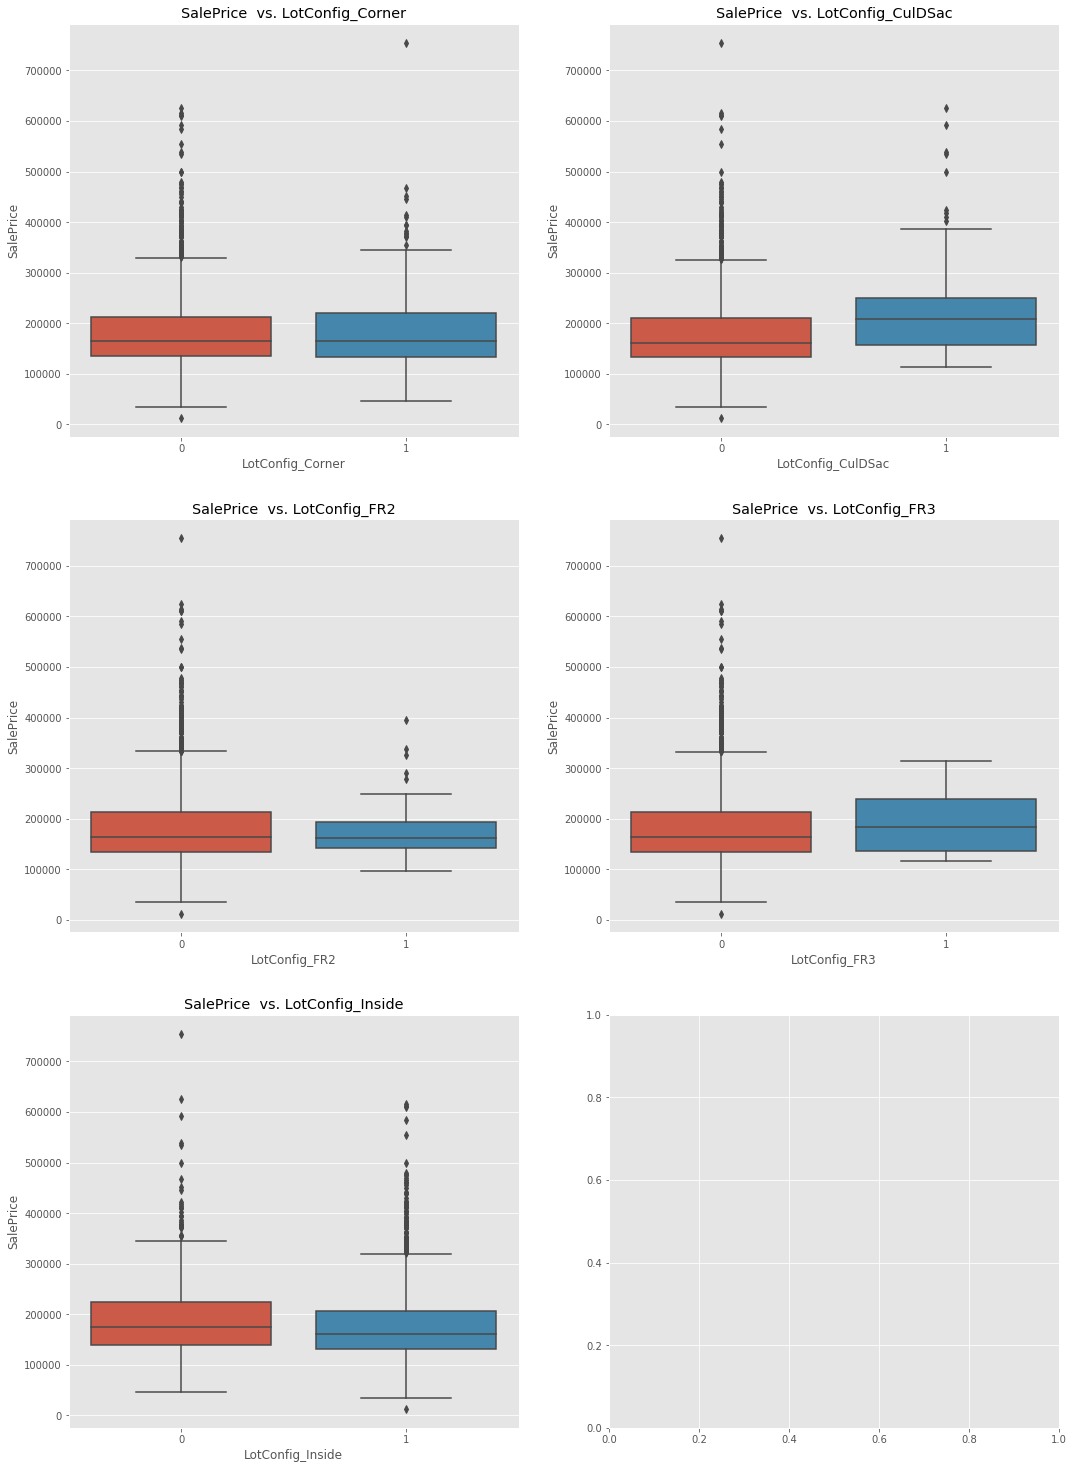

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Neighborhood
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2355
1      23
Name: Neighborhood_Blmngtn, dtype: int64
0    2368
1      10
Name: Neighborhood_Blueste, dtype: int64
0    2349
1      29
Name: Neighborhood_BrDale, dtype: int64
0    2289
1      89
Name: Neighborhood_BrkSide, dtype: int64
0    2340
1      38
Name: Neighborhood_ClearCr, dtype: int64
0    2147
1     231
Name: Neighborhood_CollgCr, dtype: int64
0    2284
1      94
Name: Neighborhood_Crawfor, dtype: int64
0    2

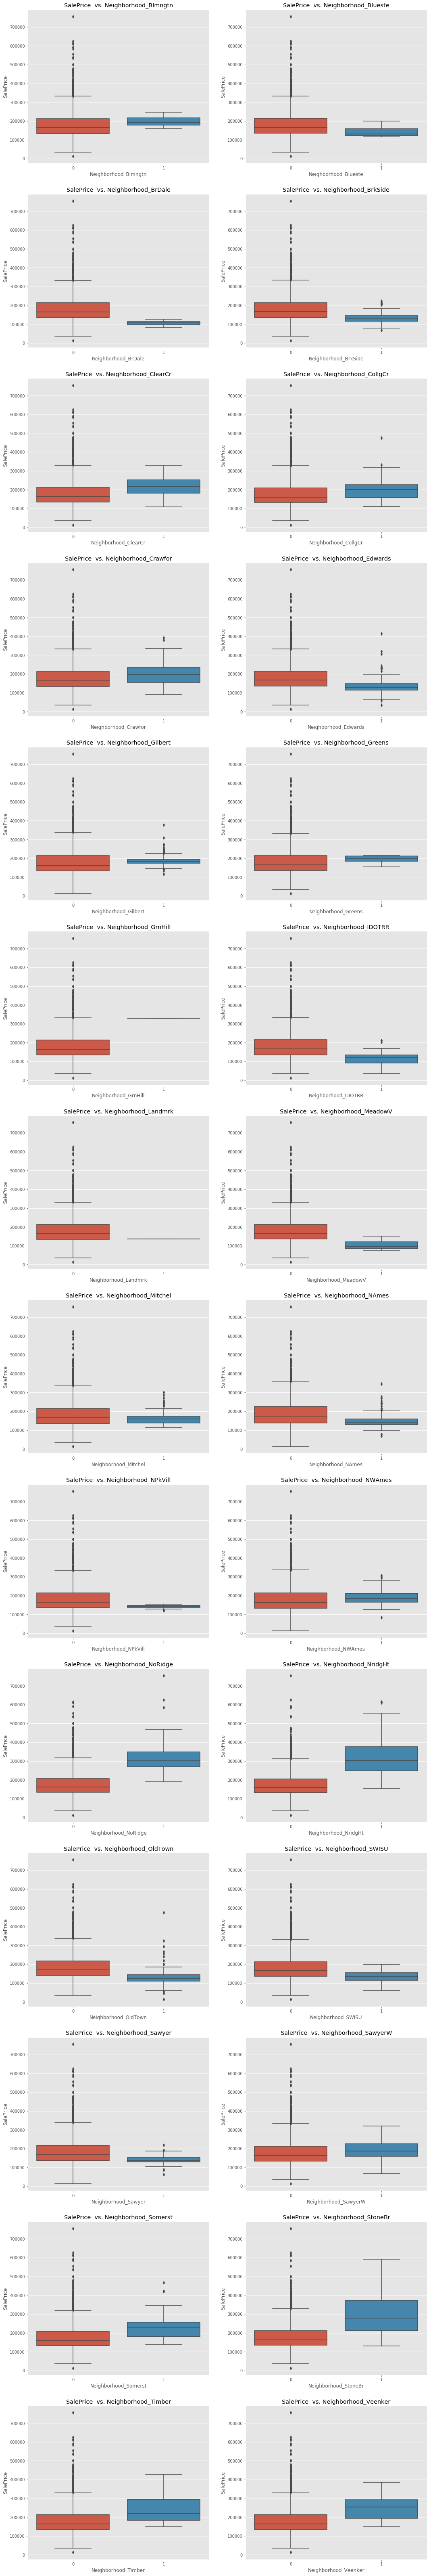

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Condition1
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2311
1      67
Name: Condition1_Artery, dtype: int64
0    2263
1     115
Name: Condition1_Feedr, dtype: int64
1    2069
0     309
Name: Condition1_Norm, dtype: int64
0    2360
1      18
Name: Condition1_PosA, dtype: int64
0    2341
1      37
Name: Condition1_PosN, dtype: int64
0    2356
1      22
Name: Condition1_RRAe, dtype: int64
0    2340
1      38
Name: Condition1_RRAn, dtype: int64
0    2374
1       4
Name: Condition1_RR

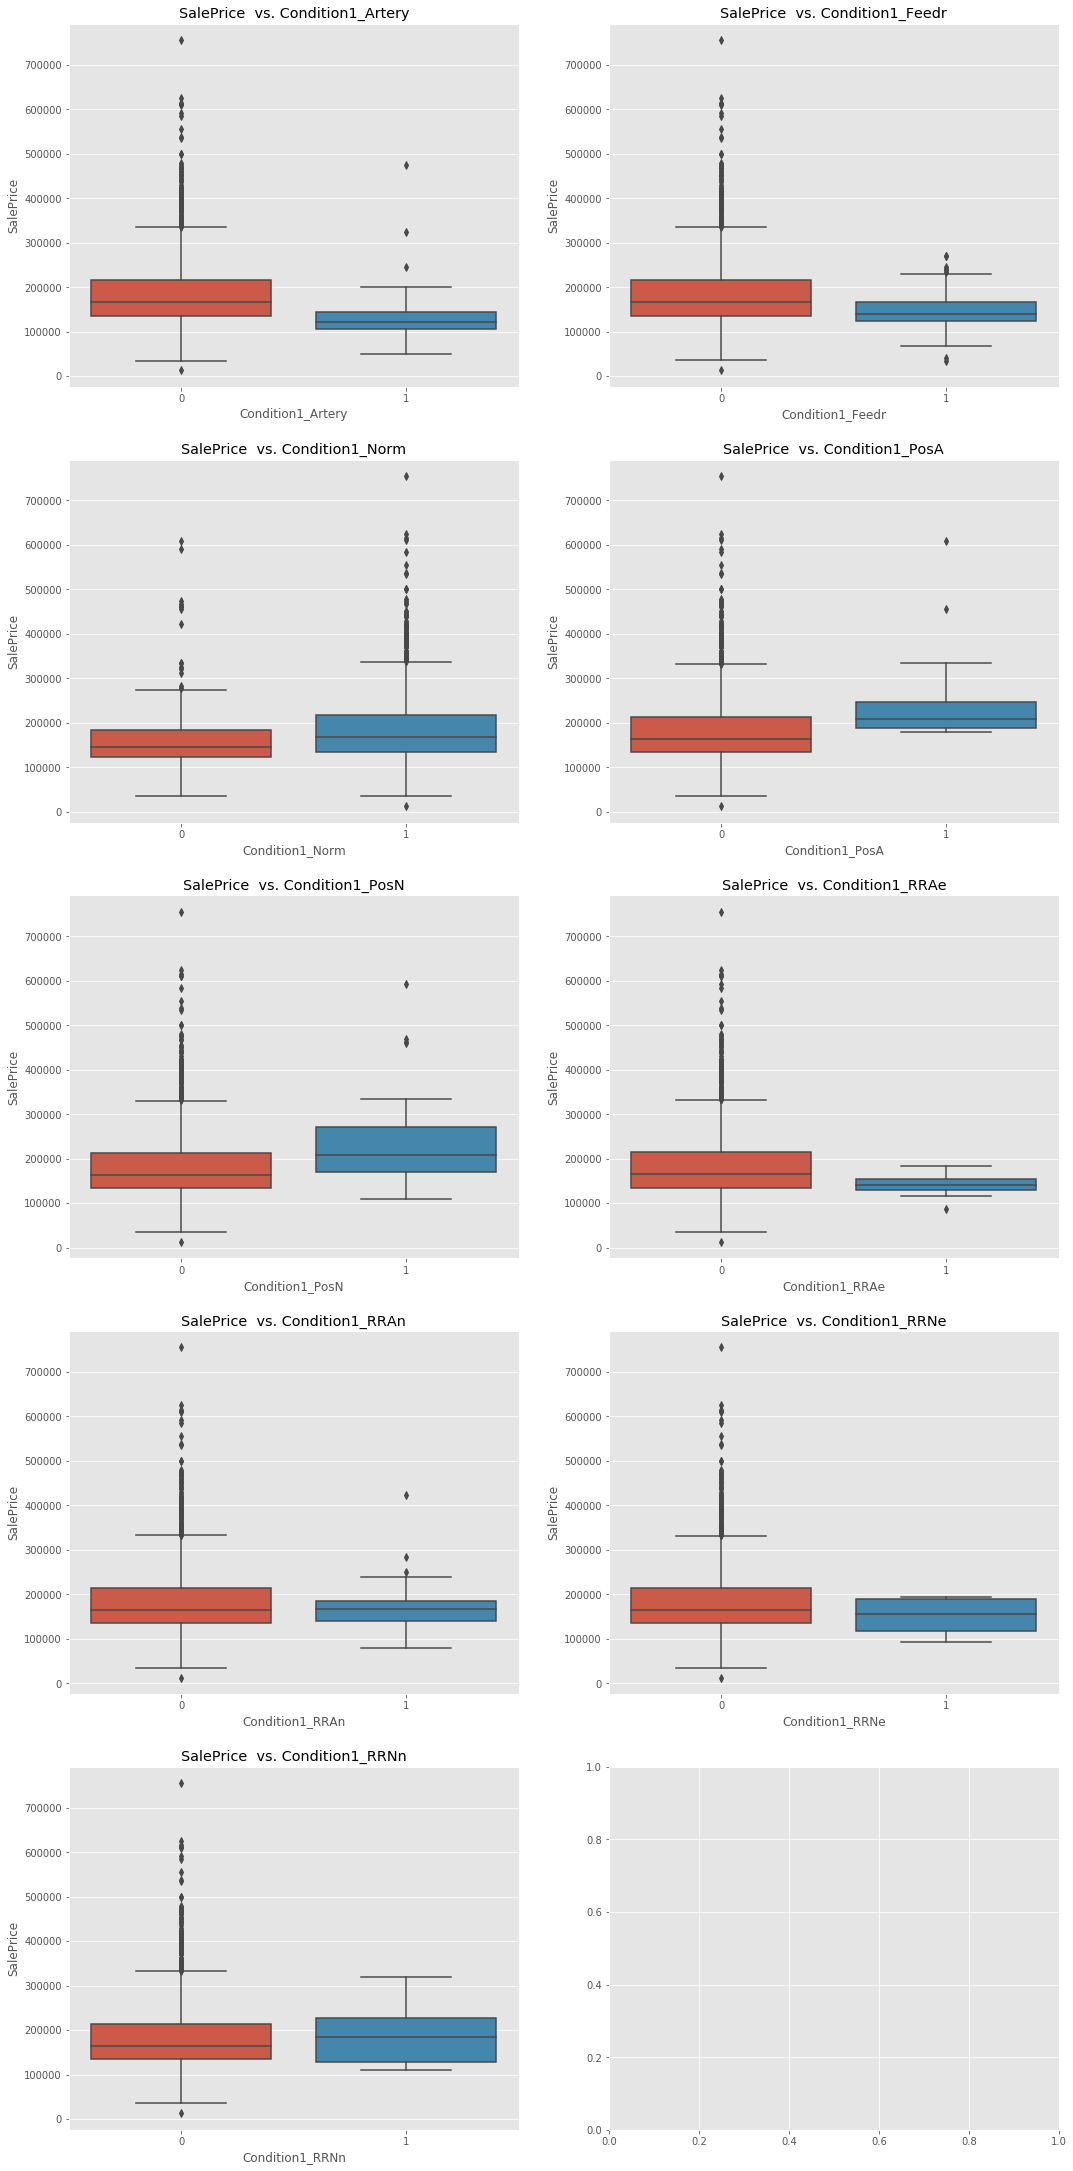

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Condition2
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2376
1       2
Name: Condition2_Artery, dtype: int64
0    2366
1      12
Name: Condition2_Feedr, dtype: int64
1    2354
0      24
Name: Condition2_Norm, dtype: int64
0    2375
1       3
Name: Condition2_PosA, dtype: int64
0    2375
1       3
Name: Condition2_PosN, dtype: int64
0    2377
1       1
Name: Condition2_RRAe, dtype: int64
0    2377
1       1
Name: Condition2_RRAn, dtype: int64
0    2376
1       2
Name: Condition2_RR

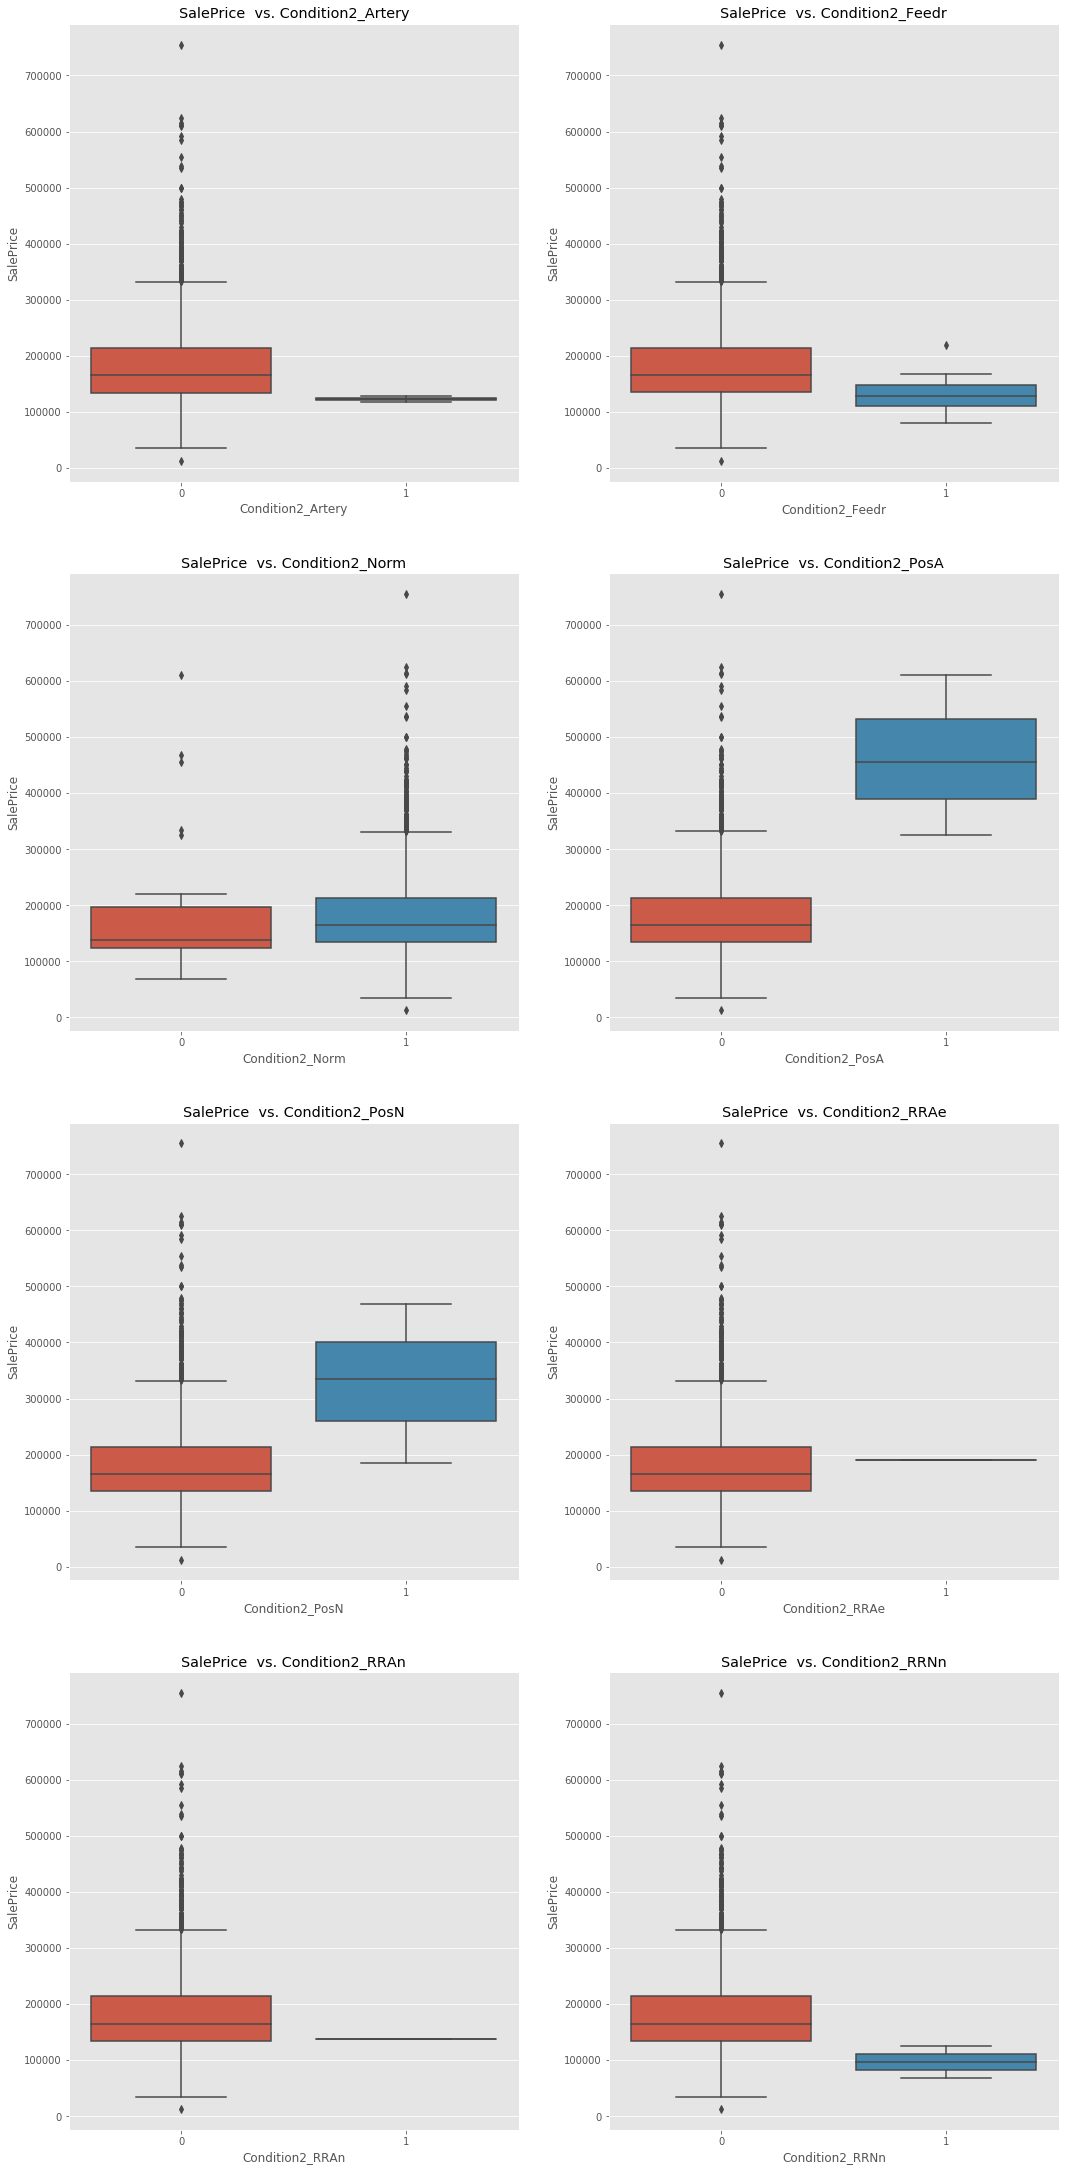

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   BldgType
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
1    2003
0     375
Name: BldgType_1Fam, dtype: int64
0    2341
1      37
Name: BldgType_2fmCon, dtype: int64
0    2327
1      51
Name: BldgType_Duplex, dtype: int64
0    2288
1      90
Name: BldgType_Twnhs, dtype: int64
0    2181
1     197
Name: BldgType_TwnhsE, dtype: int64


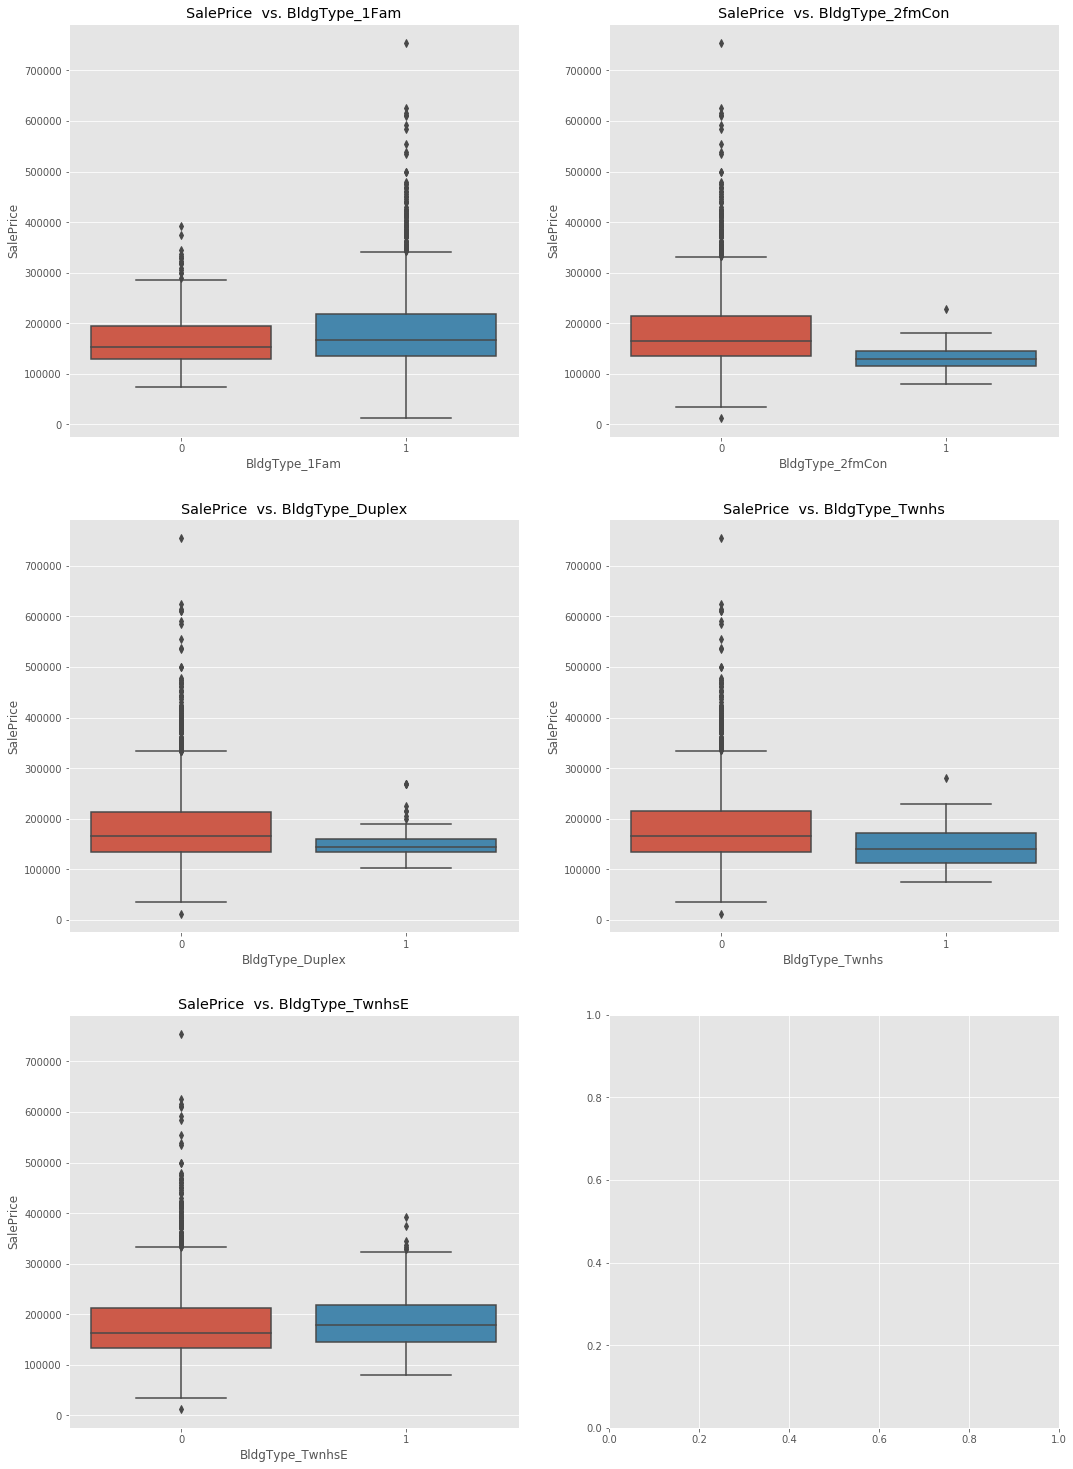

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   HouseStyle
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2122
1     256
Name: HouseStyle_1.5Fin, dtype: int64
0    2363
1      15
Name: HouseStyle_1.5Unf, dtype: int64
0    1203
1    1175
Name: HouseStyle_1Story, dtype: int64
0    2372
1       6
Name: HouseStyle_2.5Fin, dtype: int64
0    2359
1      19
Name: HouseStyle_2.5Unf, dtype: int64
0    1645
1     733
Name: HouseStyle_2Story, dtype: int64
0    2319
1      59
Name: HouseStyle_SFoyer, dtype: int64
0    2263
1     115
Name: Ho

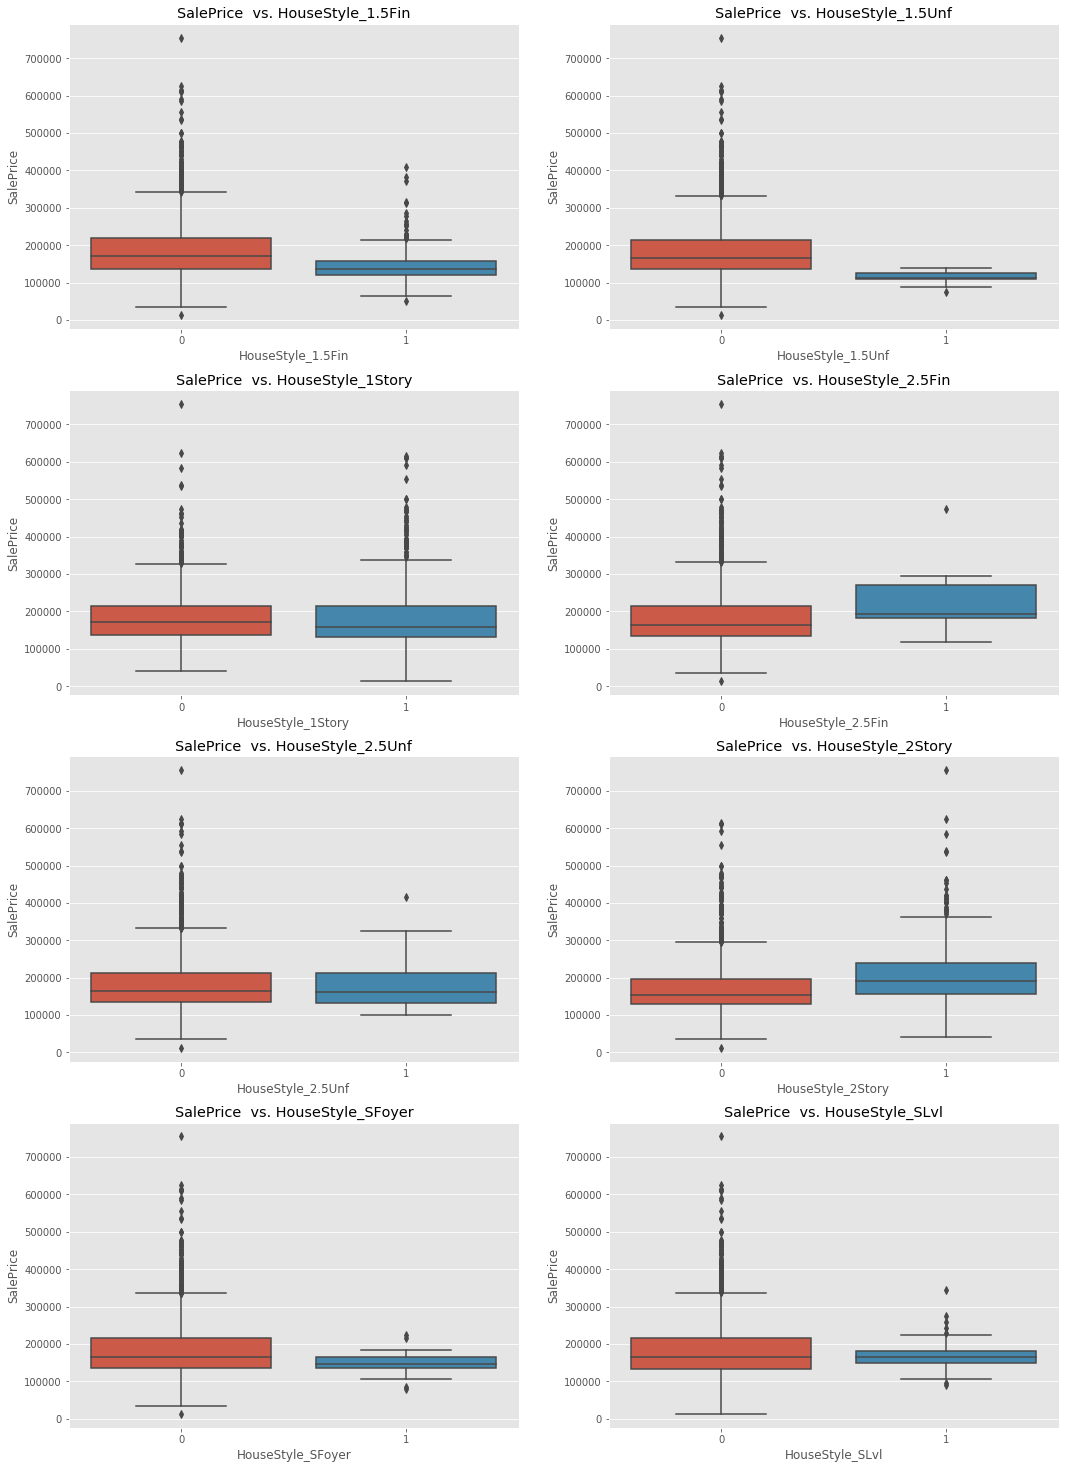

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   RoofStyle
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2366
1      12
Name: RoofStyle_Flat, dtype: int64
1    1883
0     495
Name: RoofStyle_Gable, dtype: int64
0    2360
1      18
Name: RoofStyle_Gambrel, dtype: int64
0    1926
1     452
Name: RoofStyle_Hip, dtype: int64
0    2369
1       9
Name: RoofStyle_Mansard, dtype: int64
0    2374
1       4
Name: RoofStyle_Shed, dtype: int64


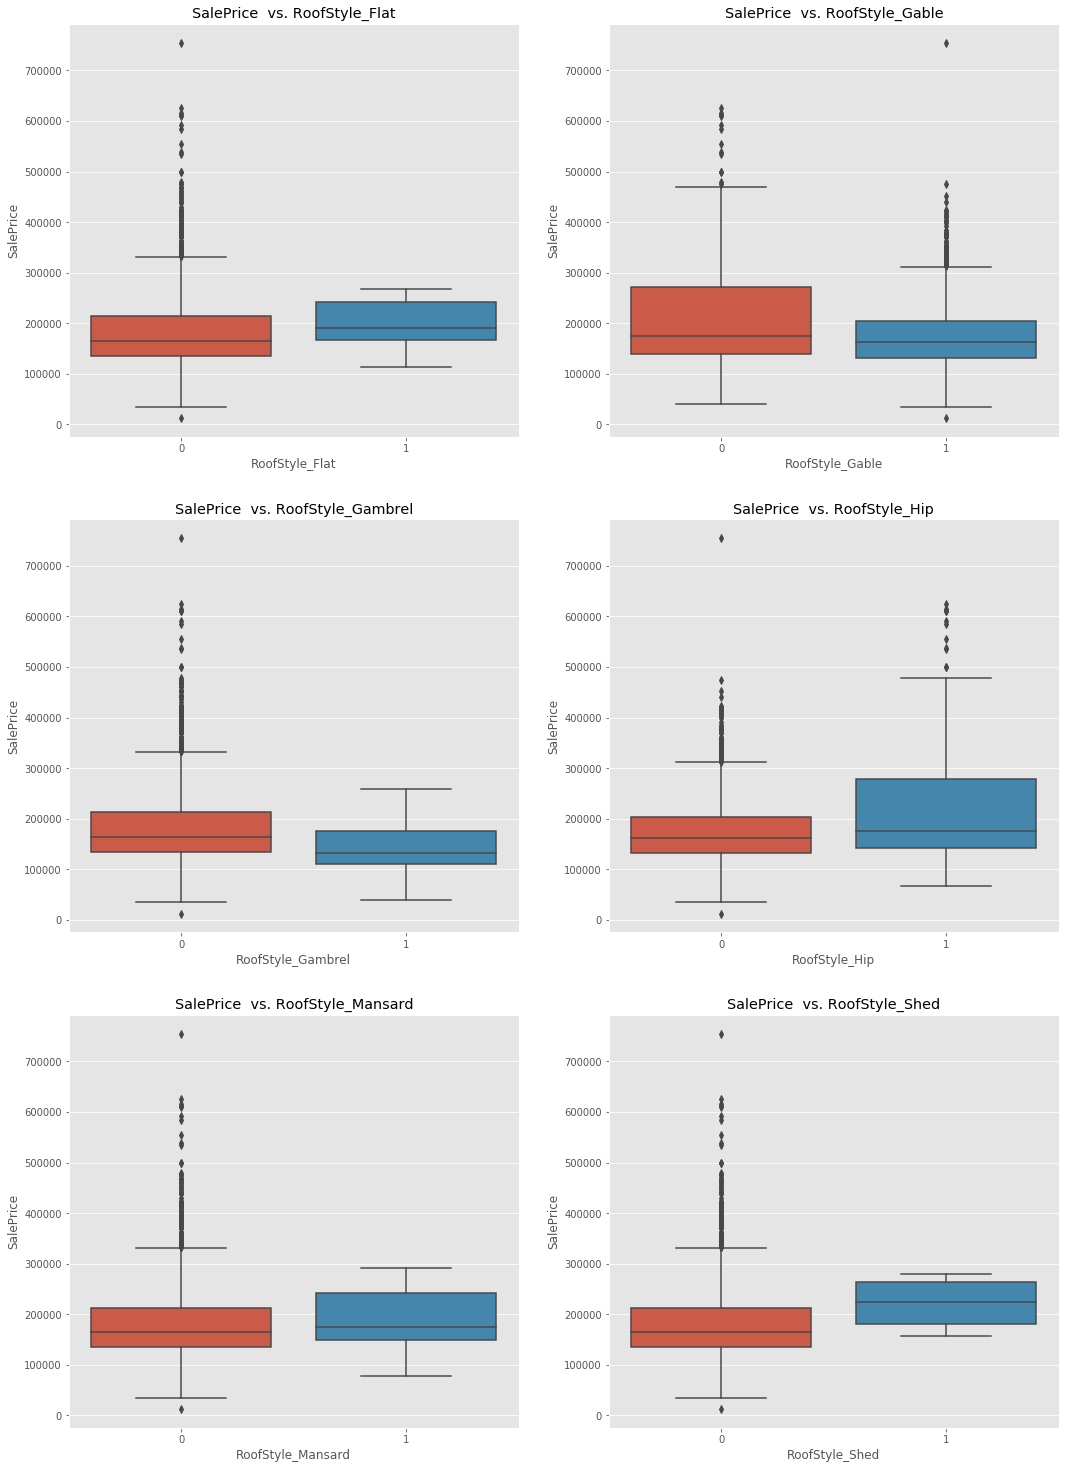

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   RoofMatl
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
1    2347
0      31
Name: RoofMatl_CompShg, dtype: int64
0    2377
1       1
Name: RoofMatl_Membran, dtype: int64
0    2377
1       1
Name: RoofMatl_Metal, dtype: int64
0    2377
1       1
Name: RoofMatl_Roll, dtype: int64
0    2365
1      13
Name: RoofMatl_Tar&Grv, dtype: int64
0    2370
1       8
Name: RoofMatl_WdShake, dtype: int64
0    2371
1       7
Name: RoofMatl_WdShngl, dtype: int64


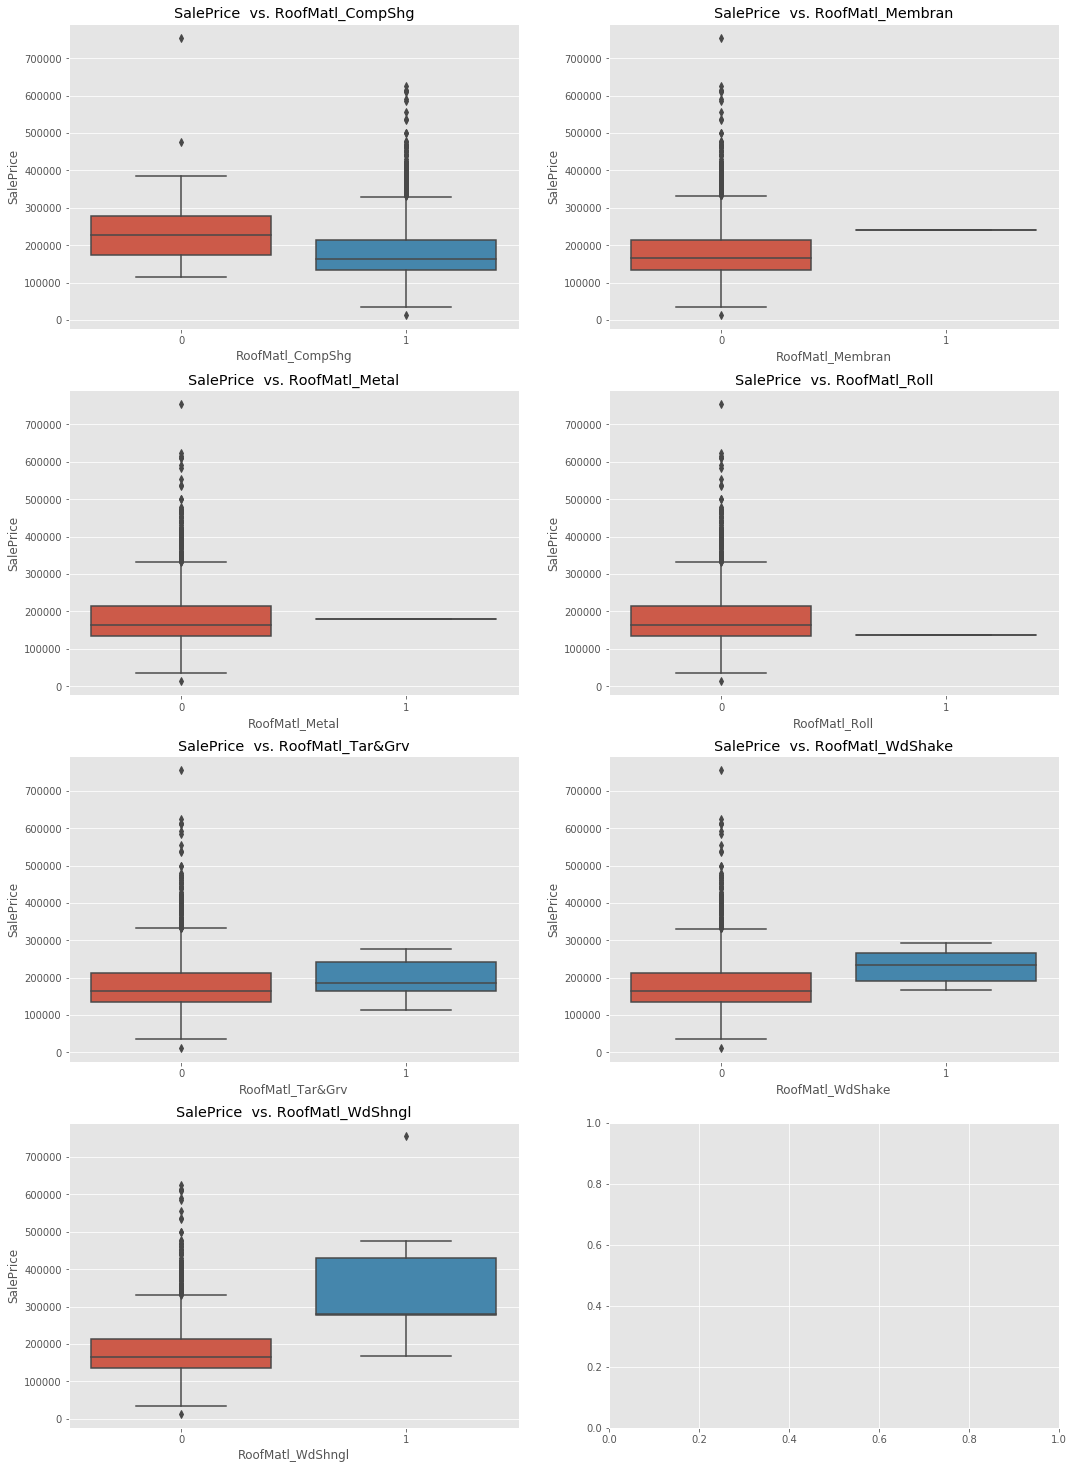

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Exterior1st
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2350
1      28
Name: Exterior1st_AsbShng, dtype: int64
0    2374
1       4
Name: Exterior1st_BrkComm, dtype: int64
0    2309
1      69
Name: Exterior1st_BrkFace, dtype: int64
0    2377
1       1
Name: Exterior1st_CBlock, dtype: int64
0    2295
1      83
Name: Exterior1st_CemntBd, dtype: int64
0    1980
1     398
Name: Exterior1st_HdBoard, dtype: int64
0    2377
1       1
Name: Exterior1st_ImStucc, dtype: int64
0    1999
1   

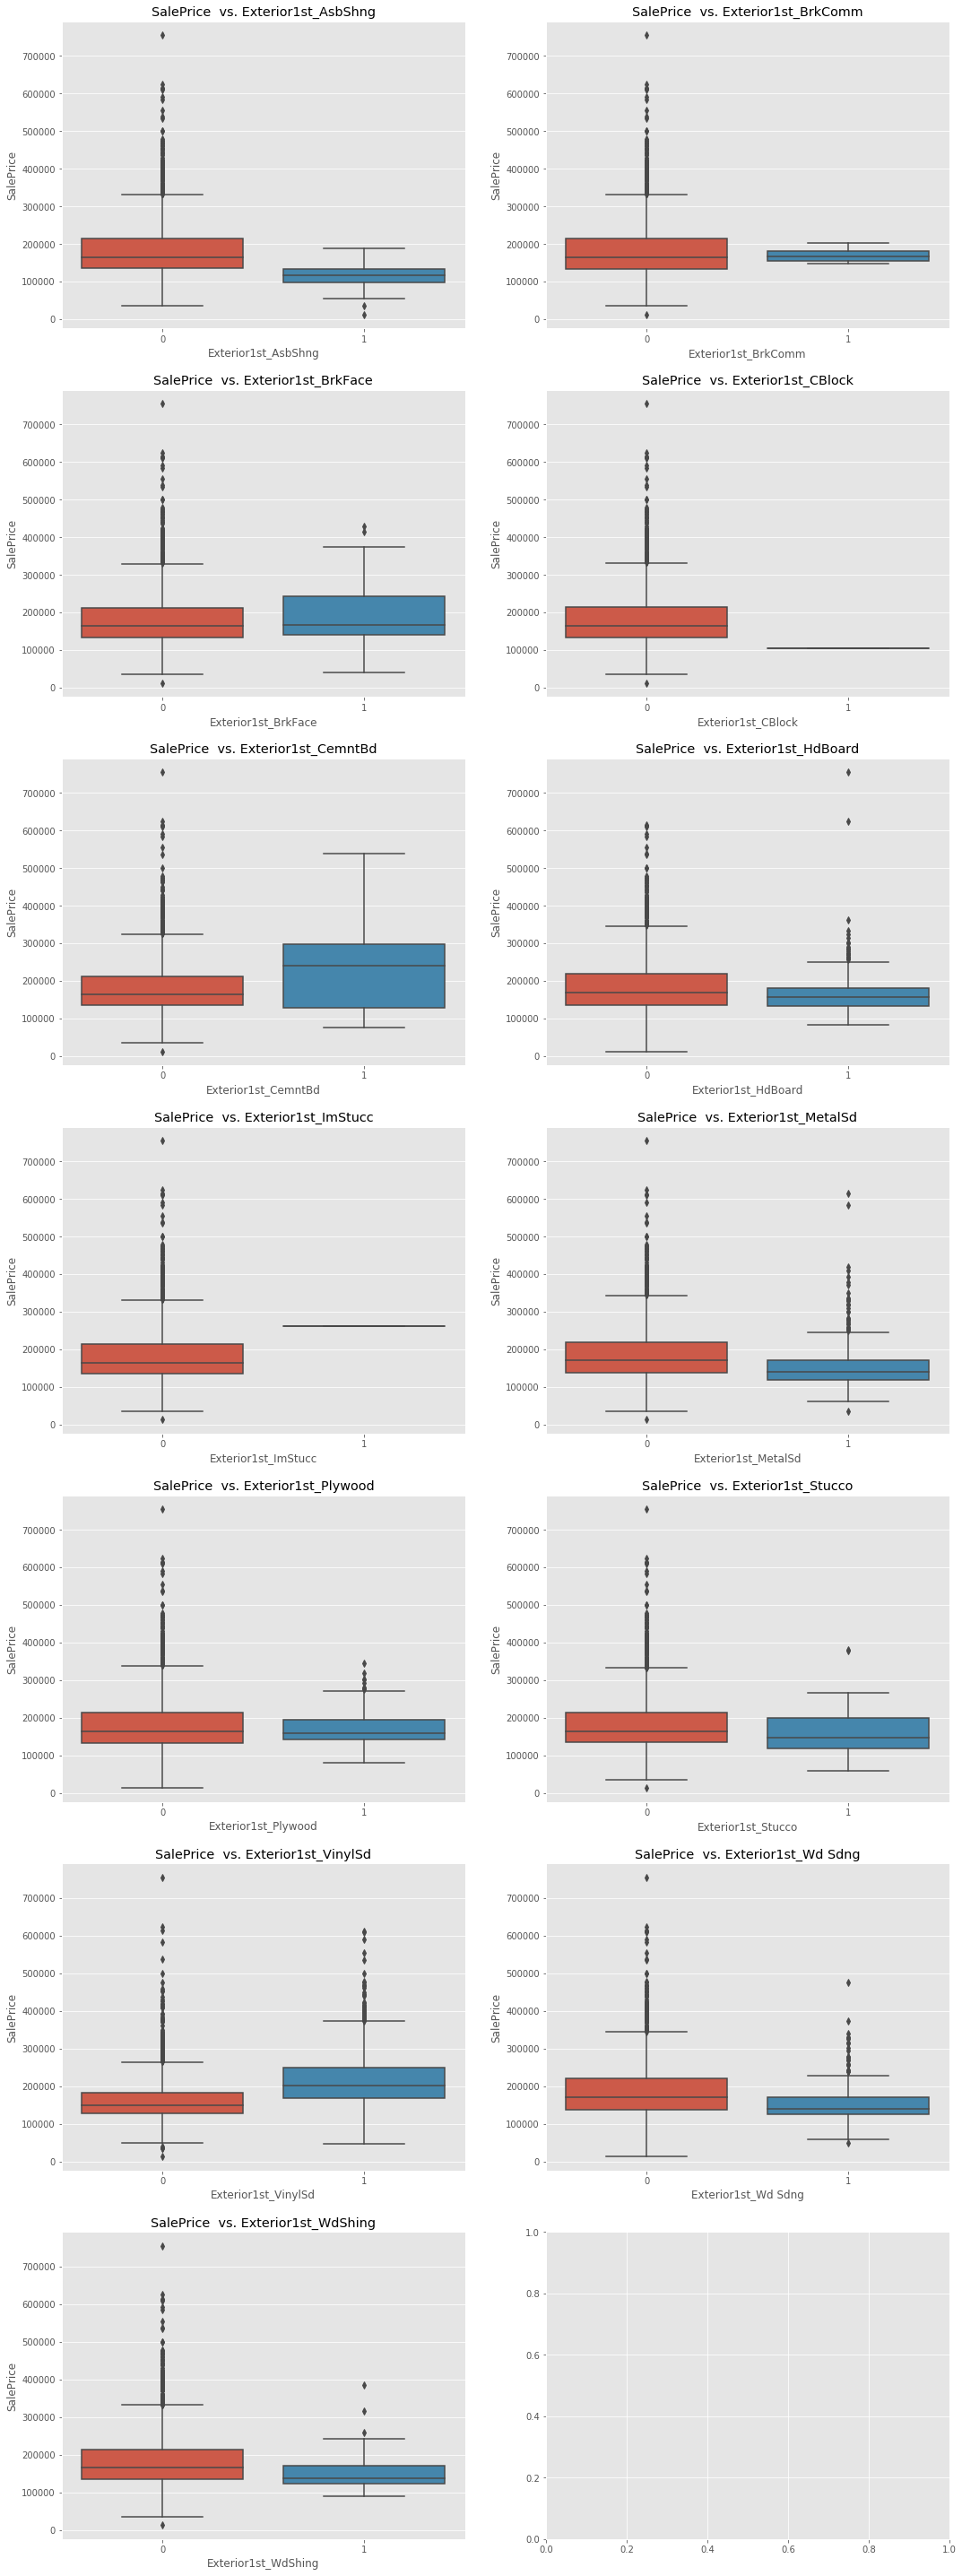

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Exterior2nd
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2352
1      26
Name: Exterior2nd_AsbShng, dtype: int64
0    2376
1       2
Name: Exterior2nd_AsphShn, dtype: int64
0    2358
1      20
Name: Exterior2nd_Brk Cmn, dtype: int64
0    2336
1      42
Name: Exterior2nd_BrkFace, dtype: int64
0    2377
1       1
Name: Exterior2nd_CBlock, dtype: int64
0    2295
1      83
Name: Exterior2nd_CmentBd, dtype: int64
0    2017
1     361
Name: Exterior2nd_HdBoard, dtype: int64
0    2365
1   

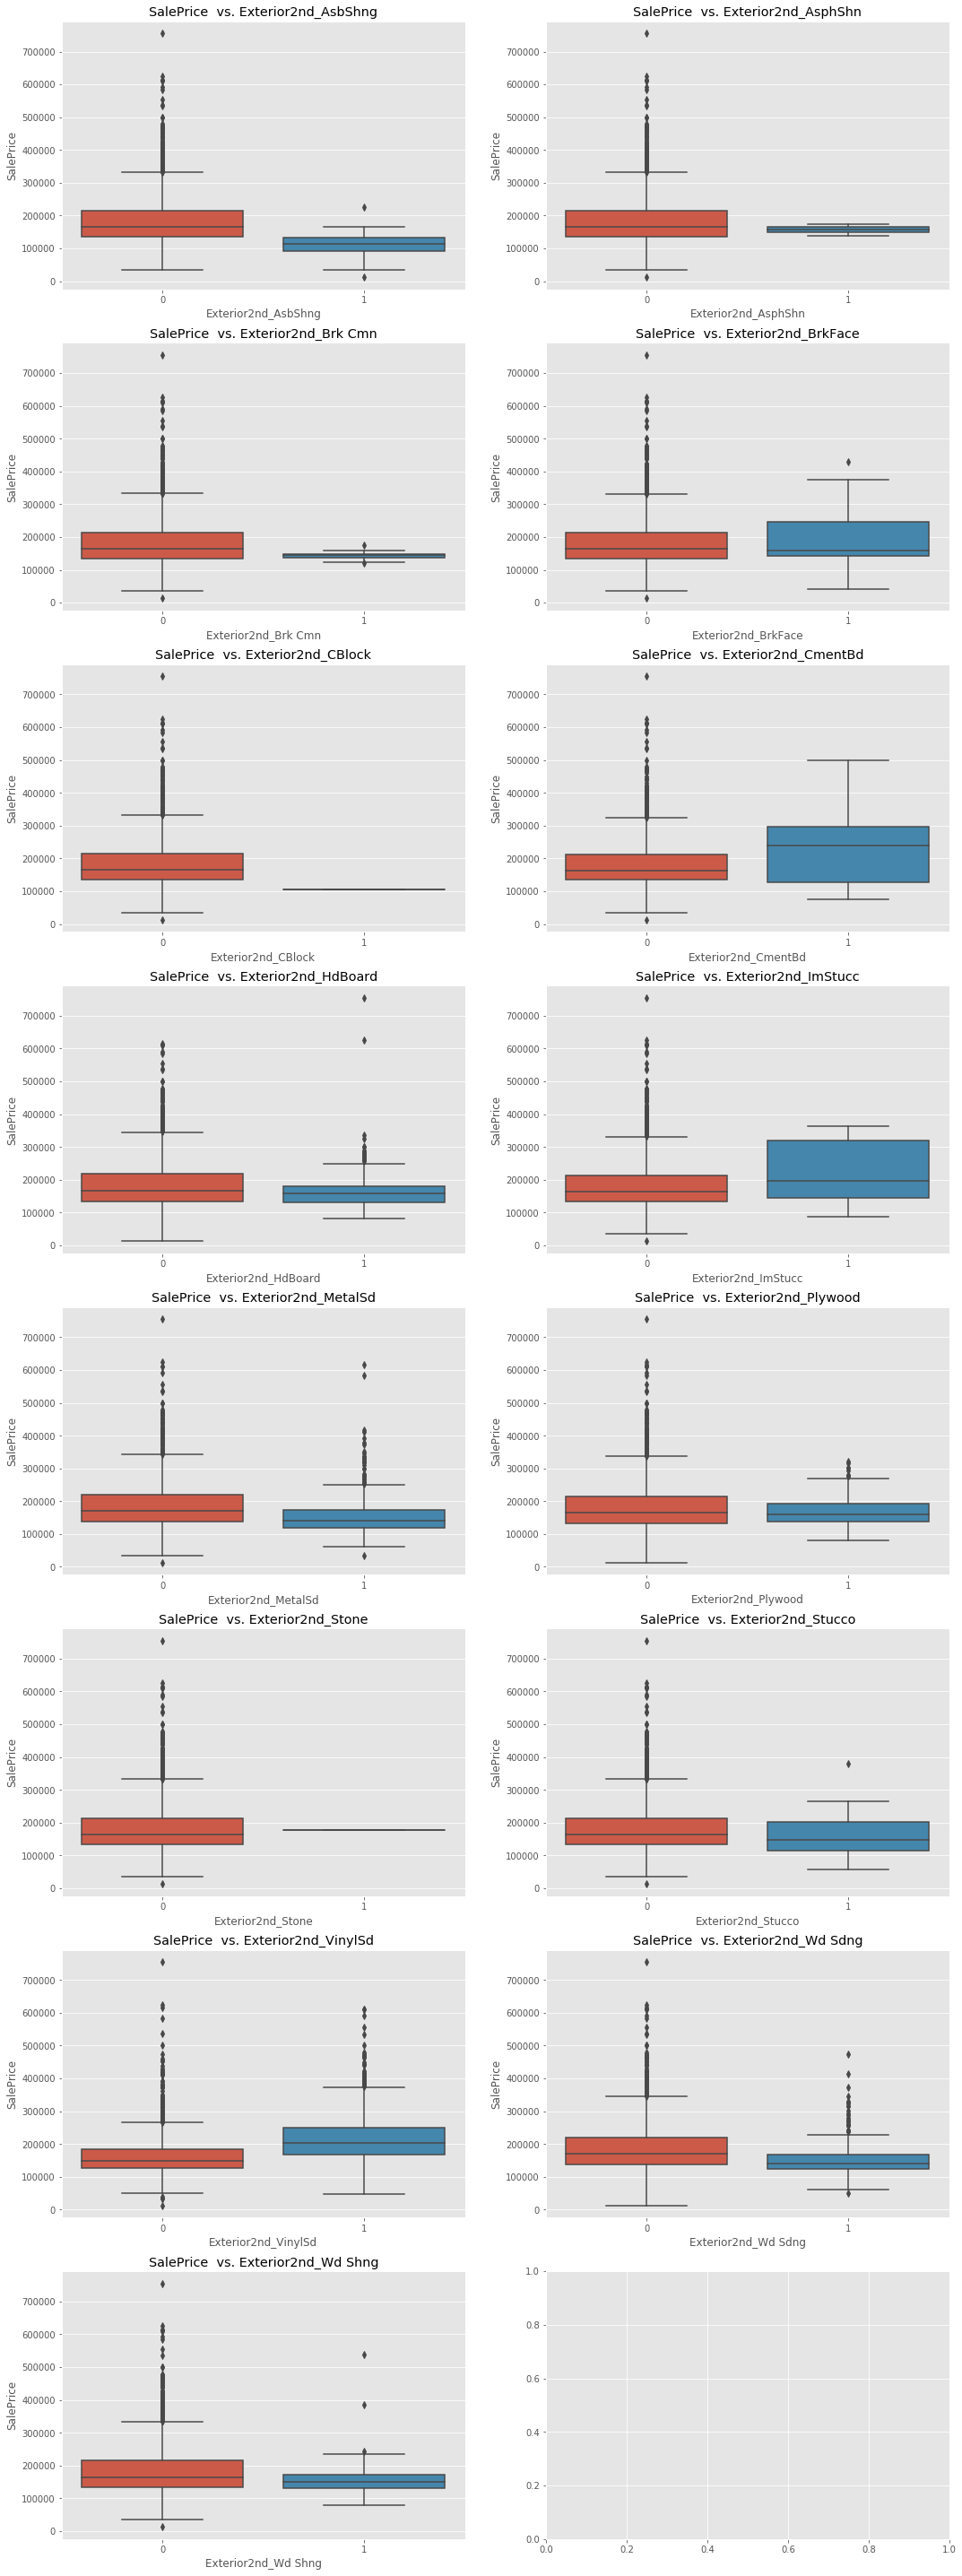

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   MasVnrType
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2361
1      17
Name: MasVnrType_BrkCmn, dtype: int64
0    1594
1     784
Name: MasVnrType_BrkFace, dtype: int64
1    1395
0     983
Name: MasVnrType_None, dtype: int64
0    2196
1     182
Name: MasVnrType_Stone, dtype: int64


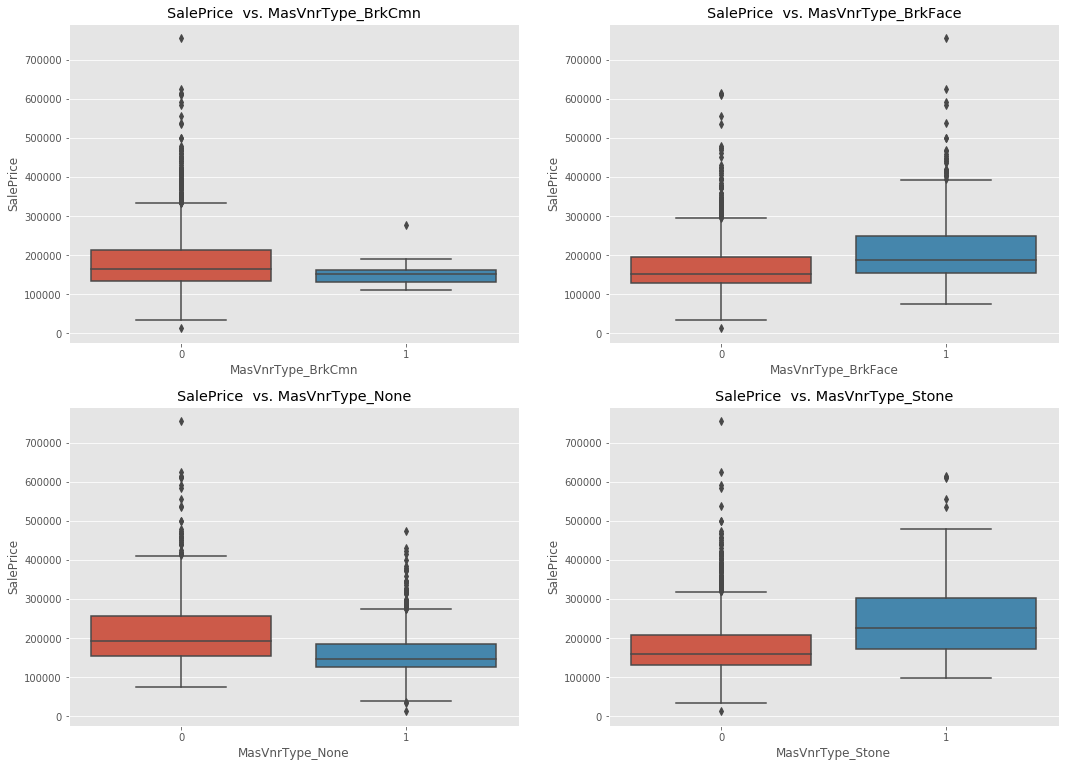

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Foundation
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2129
1     249
Name: Foundation_BrkTil, dtype: int64
0    1319
1    1059
Name: Foundation_CBlock, dtype: int64
0    1322
1    1056
Name: Foundation_PConc, dtype: int64
0    2369
1       9
Name: Foundation_Stone, dtype: int64
0    2373
1       5
Name: Foundation_Wood, dtype: int64


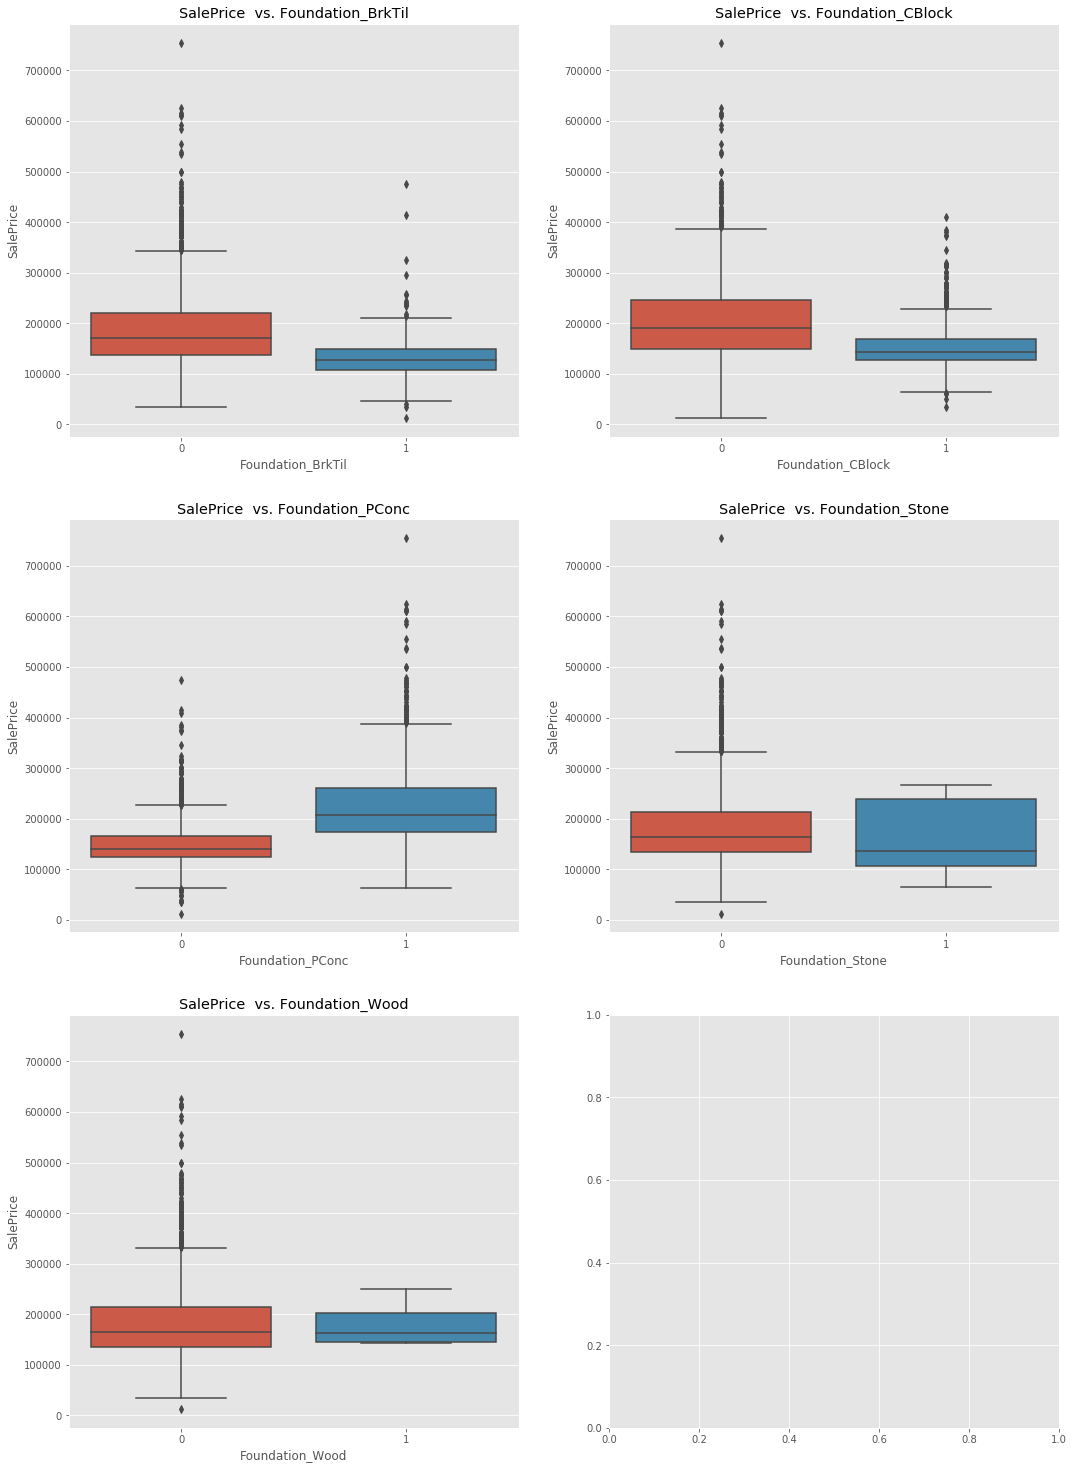

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Heating
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
1    2351
0      27
Name: Heating_GasA, dtype: int64
0    2355
1      23
Name: Heating_GasW, dtype: int64
0    2375
1       3
Name: Heating_Grav, dtype: int64
0    2377
1       1
Name: Heating_OthW, dtype: int64


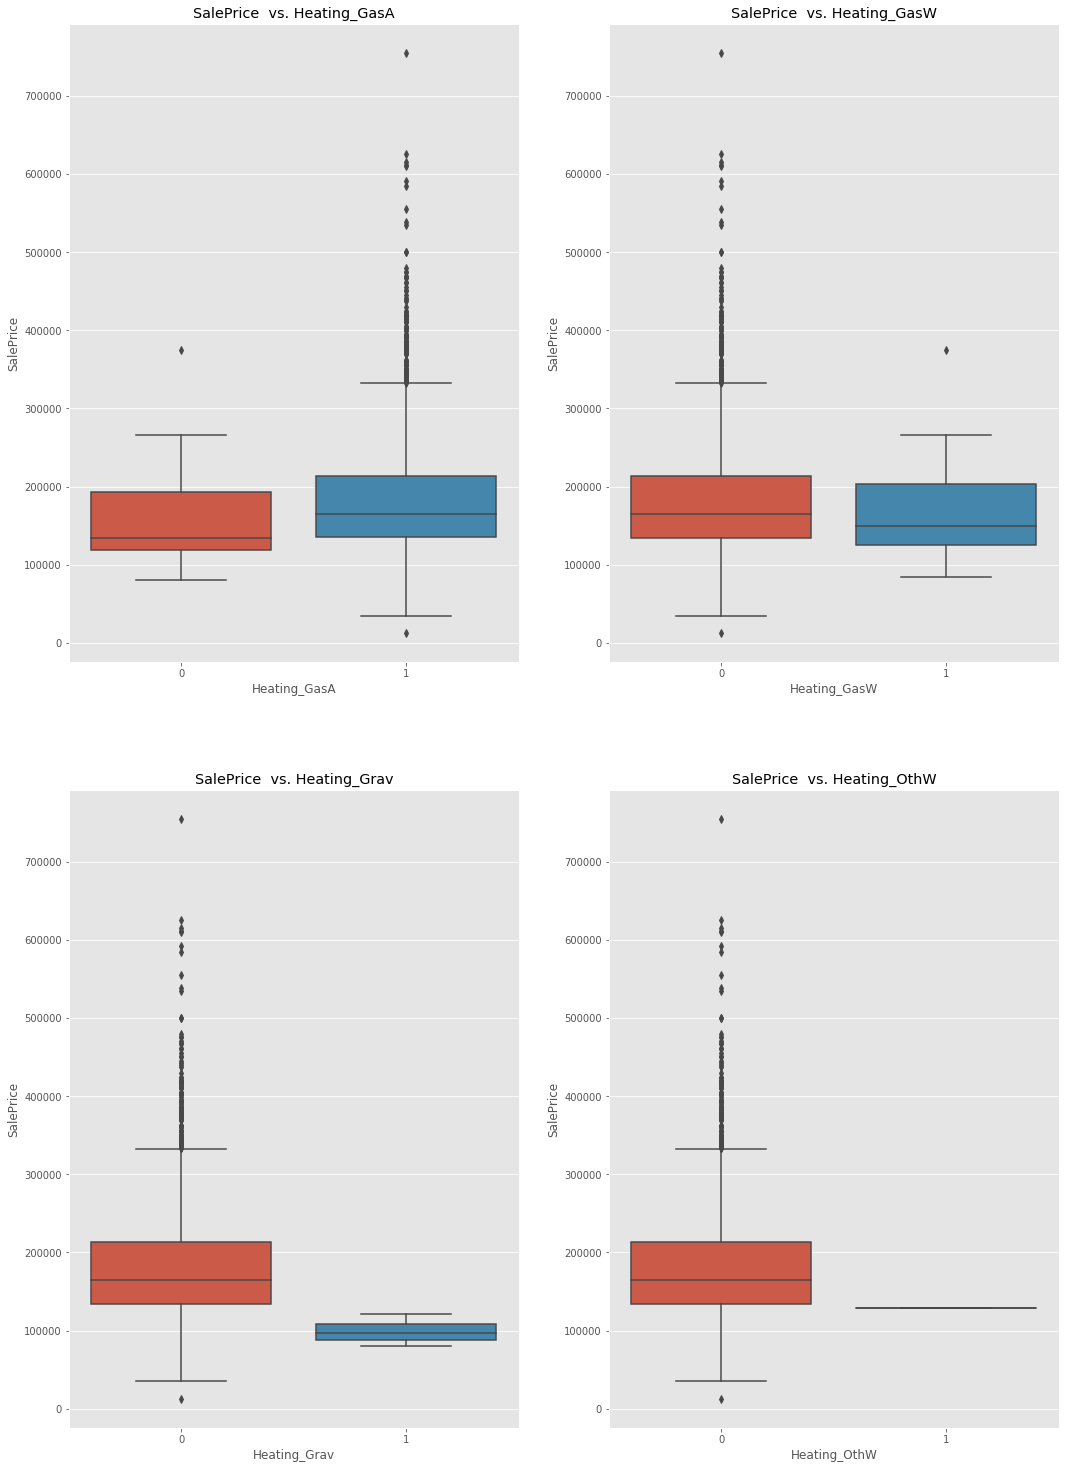

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Electrical
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2241
1     137
Name: Electrical_FuseA, dtype: int64
0    2353
1      25
Name: Electrical_FuseF, dtype: int64
0    2373
1       5
Name: Electrical_FuseP, dtype: int64
1    2211
0     167
Name: Electrical_SBrkr, dtype: int64


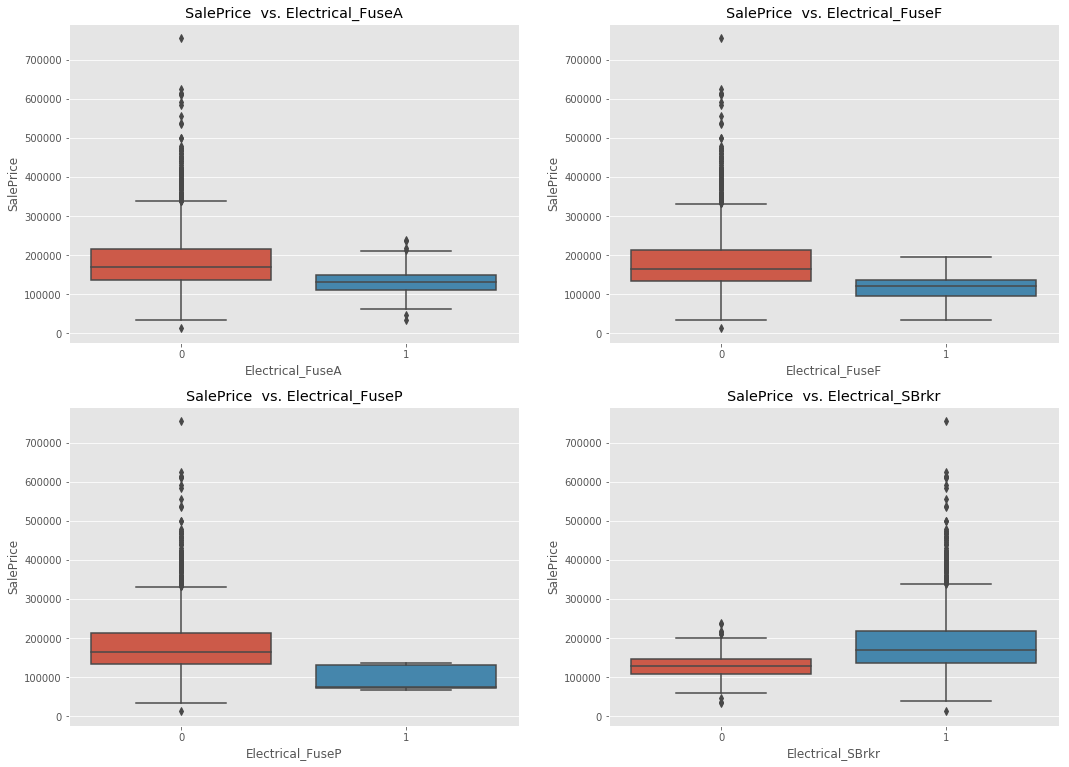

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   GarageType
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2359
1      19
Name: GarageType_2Types, dtype: int64
1    1490
0     888
Name: GarageType_Attchd, dtype: int64
0    2351
1      27
Name: GarageType_Basment, dtype: int64
0    2230
1     148
Name: GarageType_BuiltIn, dtype: int64
0    2372
1       6
Name: GarageType_CarPort, dtype: int64
0    1690
1     688
Name: GarageType_Detchd, dtype: int64


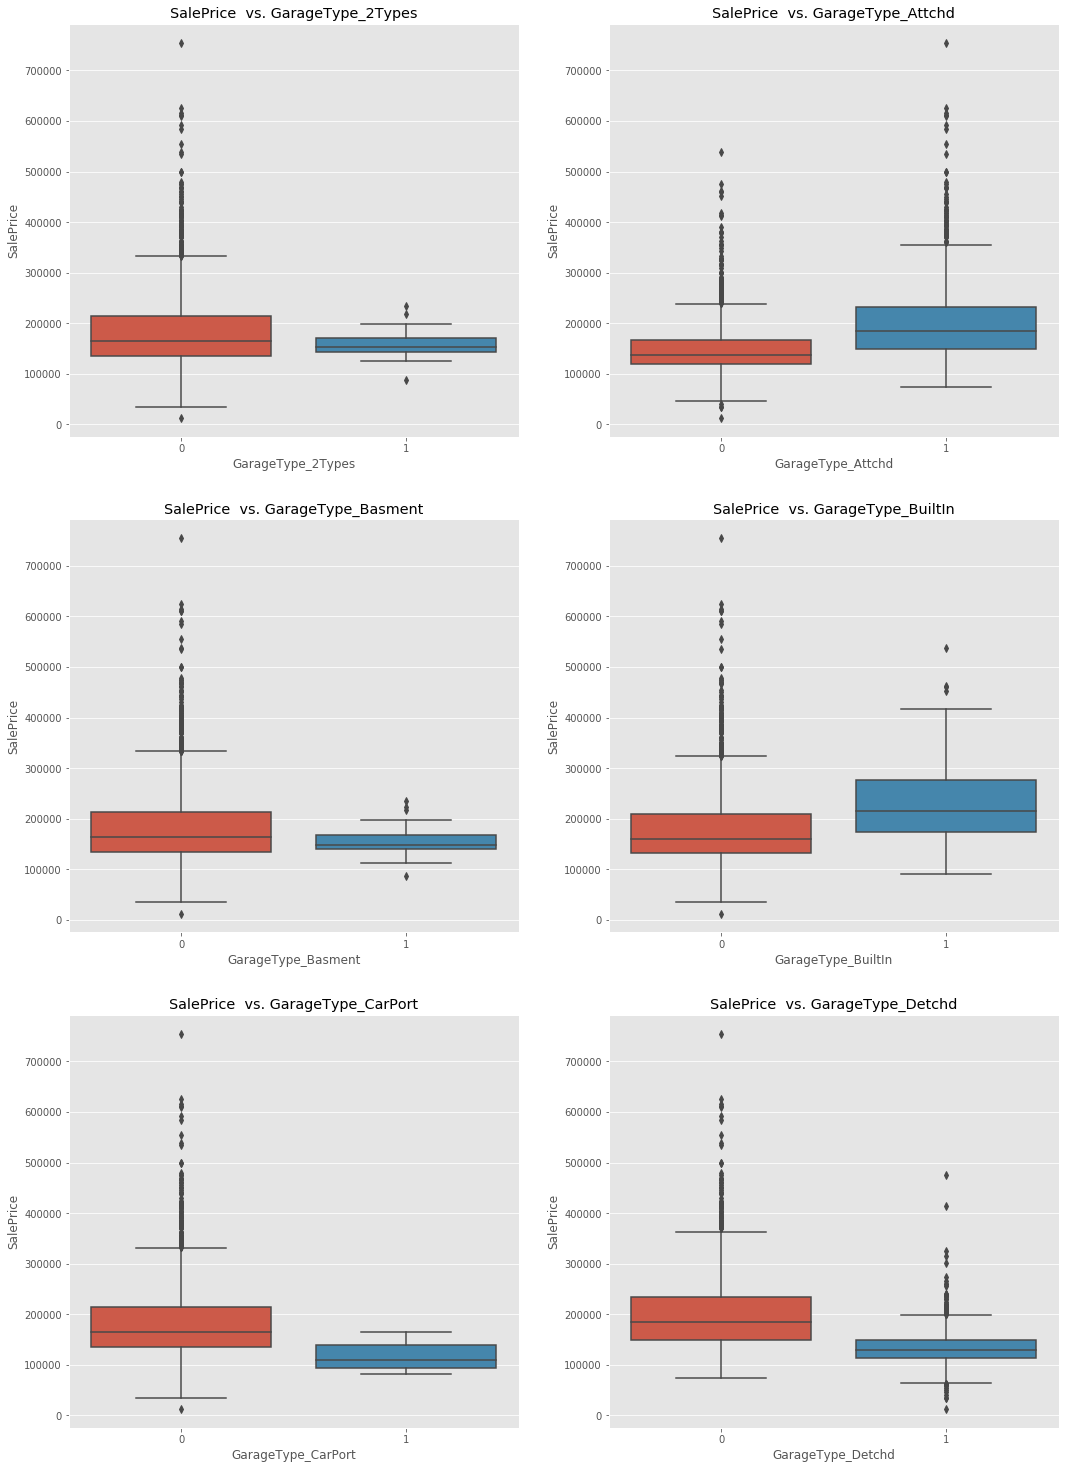

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   PavedDrive
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2259
1     119
Name: PavedDrive_N, dtype: int64
0    2324
1      54
Name: PavedDrive_P, dtype: int64
1    2205
0     173
Name: PavedDrive_Y, dtype: int64


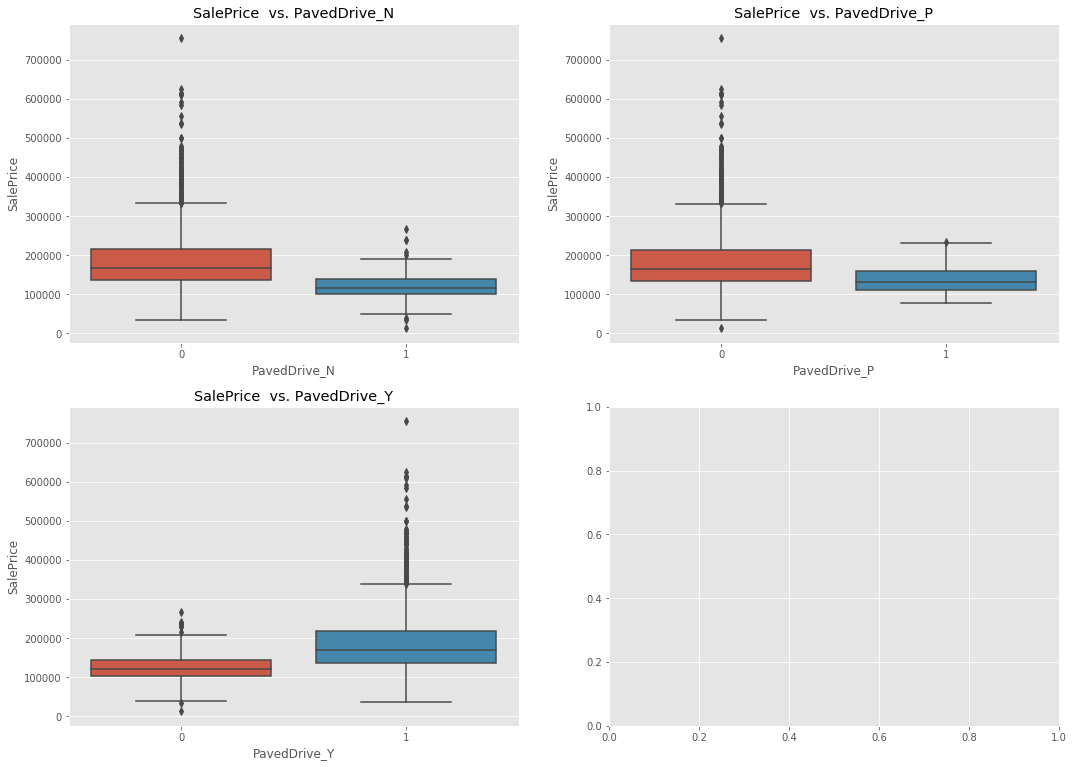

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   SaleType
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2329
1      49
Name: SaleType_COD, dtype: int64
0    2367
1      11
Name: SaleType_CWD, dtype: int64
0    2373
1       5
Name: SaleType_Con, dtype: int64
0    2362
1      16
Name: SaleType_ConLD, dtype: int64
0    2372
1       6
Name: SaleType_ConLI, dtype: int64
0    2371
1       7
Name: SaleType_ConLw, dtype: int64
0    2302
1      76
Name: SaleType_New, dtype: int64
0    2376
1       2
Name: SaleType_Oth, dtype: int64
0    2

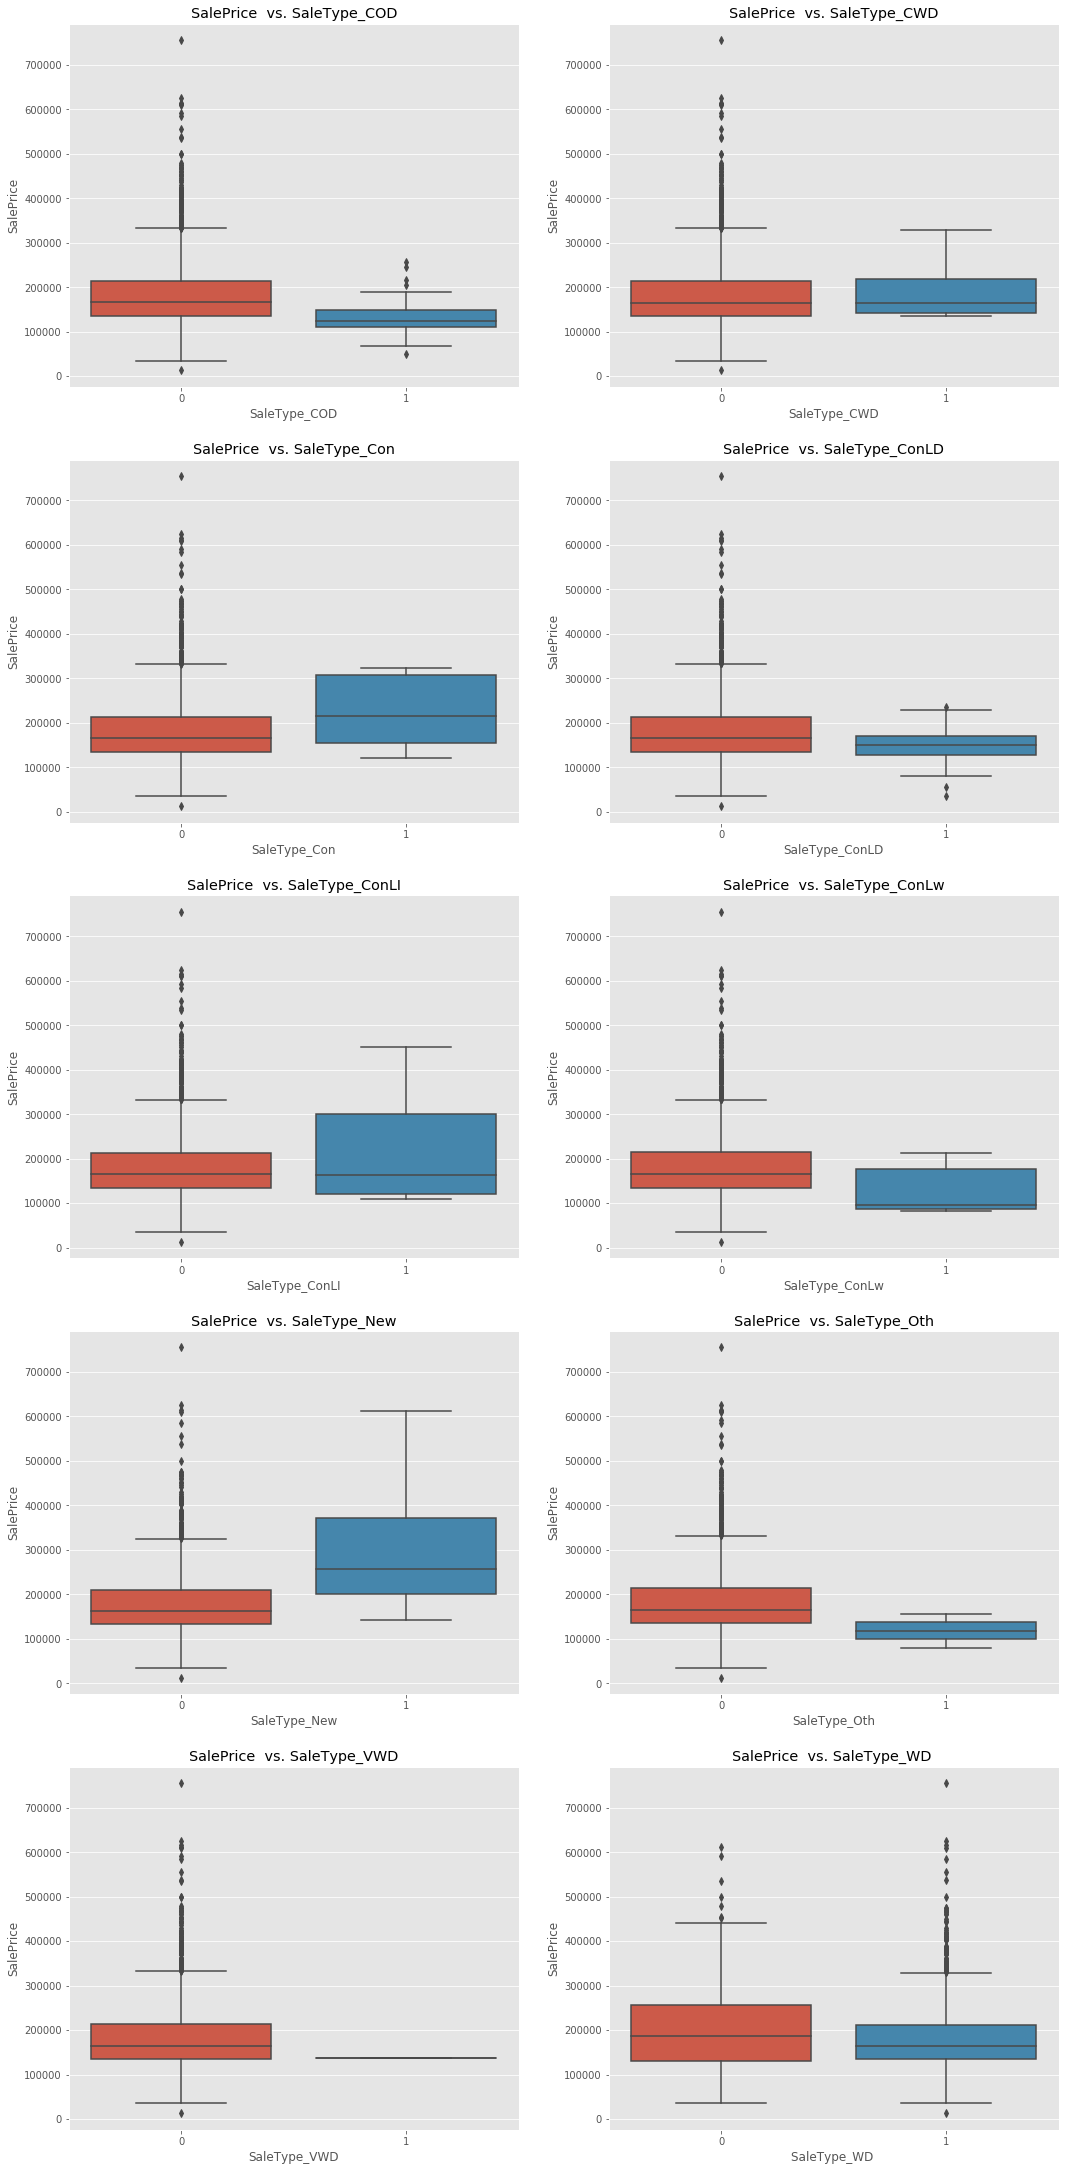

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   SaleCondition
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2326
1      52
Name: SaleCondition_Abnorml, dtype: int64
0    2377
1       1
Name: SaleCondition_Alloca, dtype: int64
0    2361
1      17
Name: SaleCondition_Family, dtype: int64
1    2229
0     149
Name: SaleCondition_Normal, dtype: int64
0    2299
1      79
Name: SaleCondition_Partial, dtype: int64


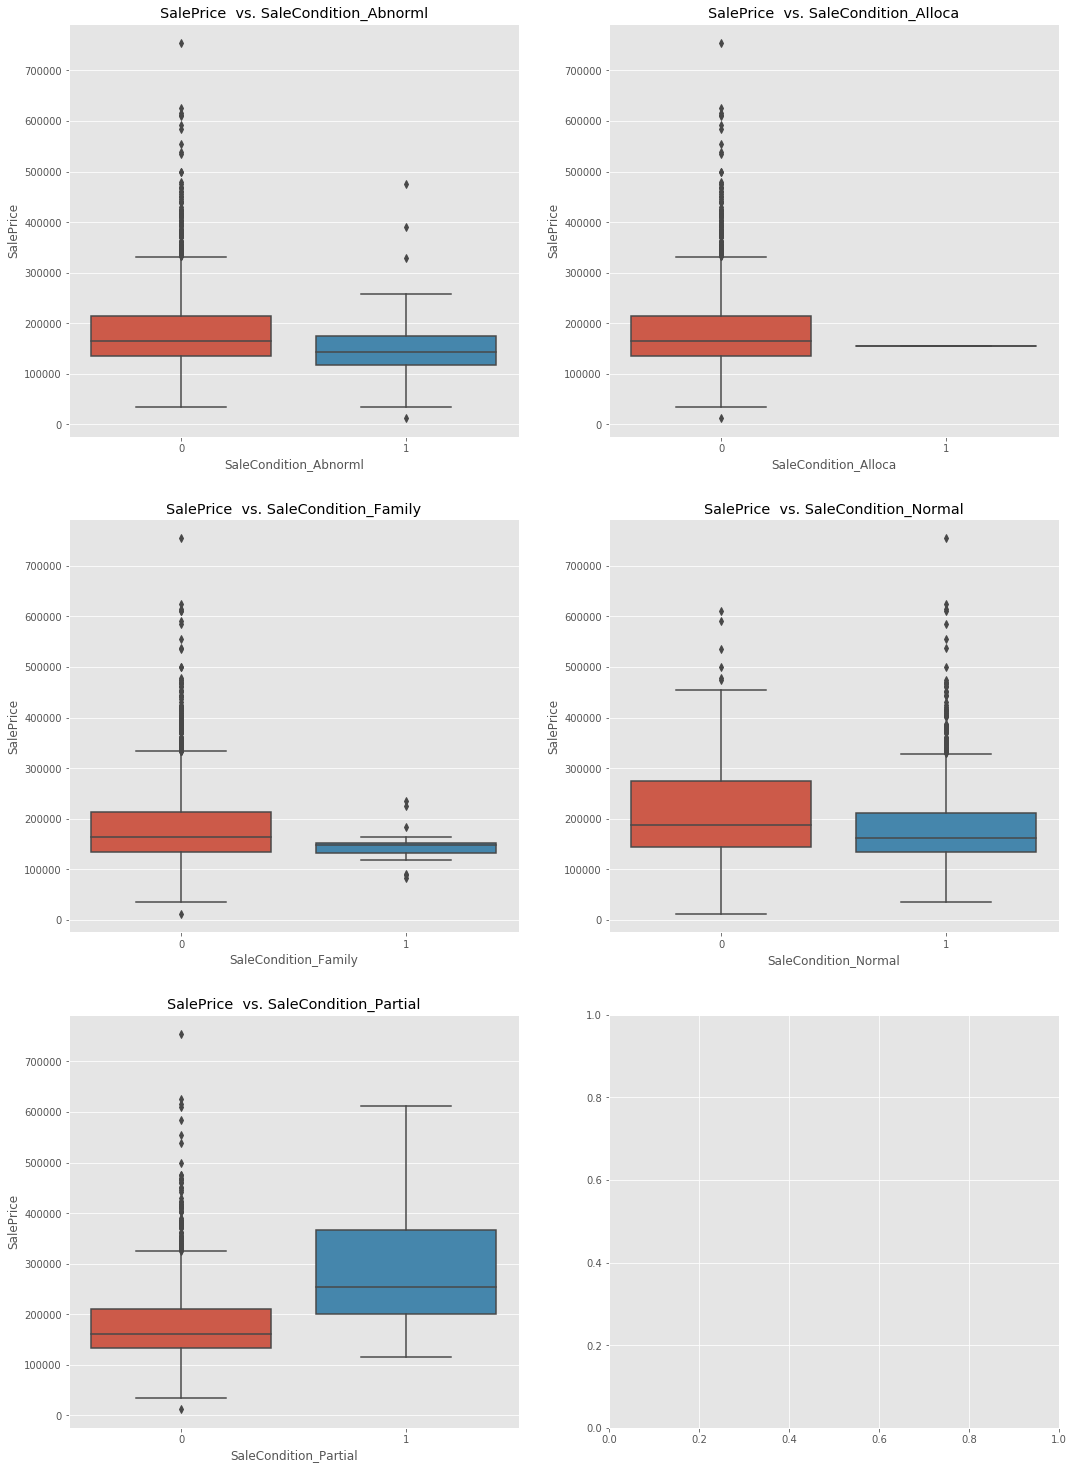

In [1748]:
for cat,dimension in enumerate(fig_sizes):
    box_maykr(dumb_data,dummy_cats[cat],'SalePrice',dimension)

# Making 'other' columns for selec dummy categories

In [1749]:
def make_other_col(df,new_col_name,col_index,list_of_cols_to_group):
    """
    takes a list of columns to group into an other category in a dataframe
    
    df:  dataframe to manipulate
    new_col_name: string, what we want to call the grouped col name
    col_index: int, what column index we want to insert our new column
    list_of_cols_to_group = list of columns in the df that we want to group, these columns are assumed to contain 
                            binary values (0,1)
    
    """
    
    df.loc[:,new_col_name] = [0]*len(df)
    
    temp_column = df.pop(new_col_name)
    df.insert(col_index, new_col_name, temp_column)
    
    df.loc[:,new_col_name] = list(df[list_of_cols_to_group].sum(axis = 1))


    df = df.drop(list_of_cols_to_group,axis = 1)


    return df

In [1786]:
cats_to_drop = []
for cat_list in dummy_cats:
    for cat in cat_list:
        if dumb_data[cat].value_counts()[1] <=40:
            cats_to_drop.append(cat)

            
list(enumerate(cats_to_drop))  
cats_to_drop

KeyError: 'Street_Grvl'

In [1785]:
ls = ['MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES','MSSubClass_1-1/2 STORY PUD - ALL AGES',
      'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES','MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
      'MSSubClass_2-1/2 STORY ALL AGES','MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
      'MSSubClass_SPLIT FOYER']

dumb_data = make_other_col(dumb_data,'MSSubClass_other',53,ls)
print(sum(list(dumb_data.loc[:,'MSSubClass_other':'MSSubClass_SPLIT OR MULTI-LEVEL'].sum())),len(dumb_data))
dumb_data.head()



ls = ['MSZoning_C (all)','MSZoning_I (all)','MSZoning_RH']

dumb_data = make_other_col(dumb_data,'MSZoning_other',63,ls)
print(sum(dumb_data.loc[:,'MSZoning_other':'MSZoning_RM'].sum()),len(dumb_data))
dumb_data.head()


ls = ['LotConfig_Corner','LotConfig_FR3']

dumb_data = make_other_col(dumb_data,'LotConfig_other',75,ls)
print(sum(dumb_data.loc[:,'LotConfig_other':'LotConfig_Inside'].sum()),len(dumb_data))
dumb_data.head()



ls = ['Condition1_PosA','Condition1_PosN','Condition1_RRAe','Condition1_RRAn','Condition1_RRNe','Condition1_RRNn']

dumb_data = make_other_col(dumb_data,'Condition1_other',107,ls)
print(sum(dumb_data.loc[:,'Condition1_other':'Condition1_Norm'].sum()),len(dumb_data))
dumb_data.head()


ls = ['HouseStyle_1.5Unf','HouseStyle_2.5Fin']

dumb_data = make_other_col(dumb_data,'HouseStyle_other',124,ls)
print(sum(dumb_data.loc[:,'HouseStyle_other':'HouseStyle_SLvl'].sum()),len(dumb_data))
dumb_data.head()


ls = ['RoofStyle_Shed','RoofStyle_Mansard','RoofStyle_Gambrel','RoofStyle_Flat']

dumb_data = make_other_col(dumb_data,'RoofStyle_other',131,ls)
print(sum(dumb_data.loc[:,'RoofStyle_other':'RoofStyle_Hip'].sum()),len(dumb_data))
dumb_data.head()

ls = ['RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl']

dumb_data = make_other_col(dumb_data,'RoofMatl_other',134,ls)
print(sum(dumb_data.loc[:,'RoofMatl_other':'RoofMatl_CompShg'].sum()),len(dumb_data))
dumb_data.head()


ls = ['Exterior1st_AsbShng', 'Exterior1st_BrkComm','Exterior1st_CBlock','Exterior1st_ImStucc','Exterior1st_Stucco']

dumb_data = make_other_col(dumb_data,'Exterior1st_other',136,ls)
print(sum(dumb_data.loc[:,'Exterior1st_other':'Exterior1st_WdShing'].sum()),len(dumb_data))
dumb_data.head()


ls = ['Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco']

dumb_data = make_other_col(dumb_data,'Exterior2nd_other',145,ls)
print(sum(dumb_data.loc[:,'Exterior2nd_other':'Exterior2nd_Wd Shng'].sum()),len(dumb_data))
dumb_data.head()



ls = ['MasVnrType_BrkCmn']

dumb_data = make_other_col(dumb_data,'MasVnrType_other',154,ls)
print(sum(dumb_data.loc[:,'MasVnrType_other':'MasVnrType_Stone'].sum()),len(dumb_data))
dumb_data.head()



ls = ['Foundation_Stone',
 'Foundation_Wood']

dumb_data = make_other_col(dumb_data,'Foundation_other',158,ls)
print(sum(dumb_data.loc[:,'Foundation_other':'Foundation_PConc'].sum()),len(dumb_data))
dumb_data.head()


ls = ['Heating_GasW',
 'Heating_Grav',
 'Heating_OthW']

dumb_data = make_other_col(dumb_data,'Heating_other',162,ls)
print(sum(dumb_data.loc[:,'Heating_other':'Heating_GasA'].sum()),len(dumb_data))
dumb_data.head()

ls = ['Electrical_FuseF',
 'Electrical_FuseP']

dumb_data = make_other_col(dumb_data,'Electrical_other',164,ls)
print(sum(dumb_data.loc[:,'Electrical_other':'Electrical_SBrkr'].sum()),len(dumb_data))
dumb_data.head()


ls = ['GarageType_2Types',
 'GarageType_Basment',
 'GarageType_CarPort']

dumb_data = make_other_col(dumb_data,'GarageType_other',167,ls)
print(sum(dumb_data.loc[:,'GarageType_other':'GarageType_Detchd'].sum()),len(dumb_data))
dumb_data.head()



list(enumerate(dumb_data.columns))

2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378


[(0, 'MapRefNo'),
 (1, 'Neighborhood'),
 (2, 'GrLivArea'),
 (3, 'SalePrice'),
 (4, 'LotArea'),
 (5, 'LotShape'),
 (6, 'LandSlope'),
 (7, 'OverallQual'),
 (8, 'OverallCond'),
 (9, 'YearBuilt'),
 (10, 'YearRemodAdd'),
 (11, 'MasVnrArea'),
 (12, 'ExterQual'),
 (13, 'ExterCond'),
 (14, 'BsmtQual'),
 (15, 'BsmtCond'),
 (16, 'BsmtExposure'),
 (17, 'BsmtFinType1'),
 (18, 'BsmtFinSF1'),
 (19, 'BsmtFinType2'),
 (20, 'BsmtFinSF2'),
 (21, 'BsmtUnfSF'),
 (22, 'TotalBsmtSF'),
 (23, 'HeatingQC'),
 (24, 'CentralAir'),
 (25, '1stFlrSF'),
 (26, '2ndFlrSF'),
 (27, 'LowQualFinSF'),
 (28, 'BsmtFullBath'),
 (29, 'BsmtHalfBath'),
 (30, 'FullBath'),
 (31, 'HalfBath'),
 (32, 'BedroomAbvGr'),
 (33, 'KitchenAbvGr'),
 (34, 'KitchenQual'),
 (35, 'TotRmsAbvGrd'),
 (36, 'Functional'),
 (37, 'Fireplaces'),
 (38, 'GarageYrBlt'),
 (39, 'GarageFinish'),
 (40, 'GarageCars'),
 (41, 'GarageArea'),
 (42, 'GarageQual'),
 (43, 'GarageCond'),
 (44, 'WoodDeckSF'),
 (45, 'OpenPorchSF'),
 (46, 'EnclosedPorch'),
 (47, '3SsnPorch'

In [1582]:
data = data.drop(['Street','Condition2'],axis = 1)
dumb_data = pd.get_dummies(data)
dumb_data = pd.merge(dumb_data,data[['MapRefNo','Neighborhood']],on = 'MapRefNo') #getting the original Neighborhood Column Back
second_column = dumb_data.pop('Neighborhood')
dumb_data.insert(1, 'Neighborhood', second_column) # changing position of Neighborhood column

# Lasso for Feature Selection on Dummified Set

In [1201]:
from sklearn.linear_model import Lasso,Ridge,LassoLarsIC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [1202]:
tr = dumb_data.copy()

train_features = tr.drop(['MapRefNo','SalePrice','Neighborhood'], axis = 1)
train_target = tr['SalePrice']


scaler = StandardScaler()
scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)


lasso = Lasso()

alpha_range = np.linspace(0,1000,1000)
lasso.set_params(normalize=True)
coefs_lasso  = []
scores = []

for alpha in alpha_range:
        lasso.set_params(alpha=alpha)
        lasso.fit(train_features_scaled,train_target)  
        coefs_lasso.append(lasso.coef_)
        scores.append(lasso.score(train_features_scaled,train_target))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alpha_range, columns = train_features.columns)  
score_lasso = score_lasso.reset_index()
score_lasso = pd.DataFrame({'lambda':alpha_range,'R^2':scores})

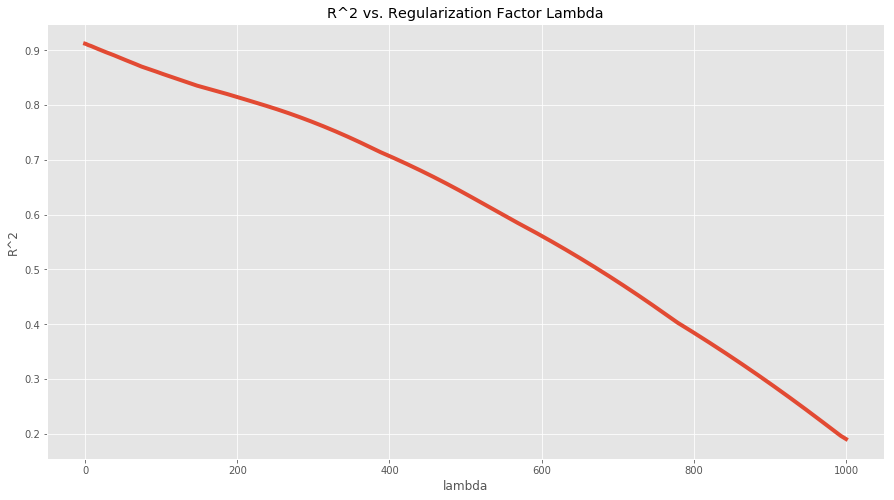

In [1203]:
fig,ax = plt.subplots()
fig.set_size_inches(15,8)
sns.lineplot(data = score_lasso.reset_index(), x= 'lambda',y = 'R^2',linewidth = 4)
plt.title('R^2 vs. Regularization Factor Lambda')
plt.show()

# Visualizing coeficients of dummy subgroups vs. normalization factor lambda

In [1204]:
Condition_2_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index( 'Condition2_Artery'):\
                                                list(coefs_lasso.columns).index( 'Condition2_RRNn' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Condition_2_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Condition_2_dummies[i],
                 data = coefs_lasso,label = Condition_2_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Condition_2 Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

ValueError: 'Condition2_Artery' is not in list

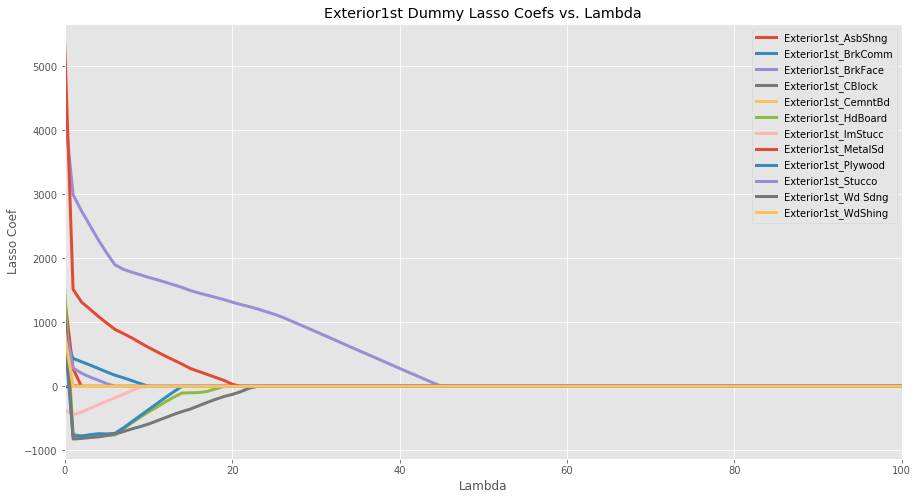

In [486]:
Exterior1st_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Exterior1st_AsbShng' ):\
                                                list(coefs_lasso.columns).index( 'Exterior1st_WdShing' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Exterior1st_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Exterior1st_dummies[i],data = coefs_lasso,label = Exterior1st_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Exterior1st Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

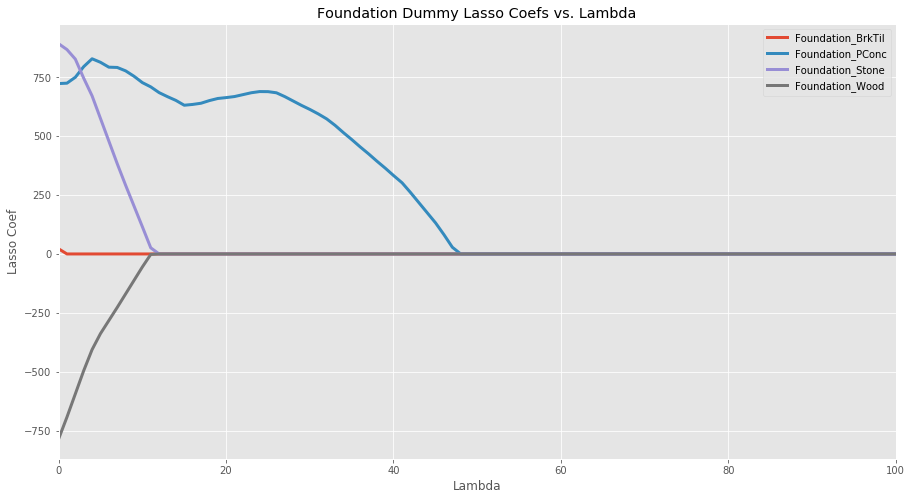

In [487]:
Foundation_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Foundation_BrkTil'):\
                                                list(coefs_lasso.columns).index('Foundation_Wood')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Foundation_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Foundation_dummies[i],data = coefs_lasso,label = Foundation_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Foundation Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

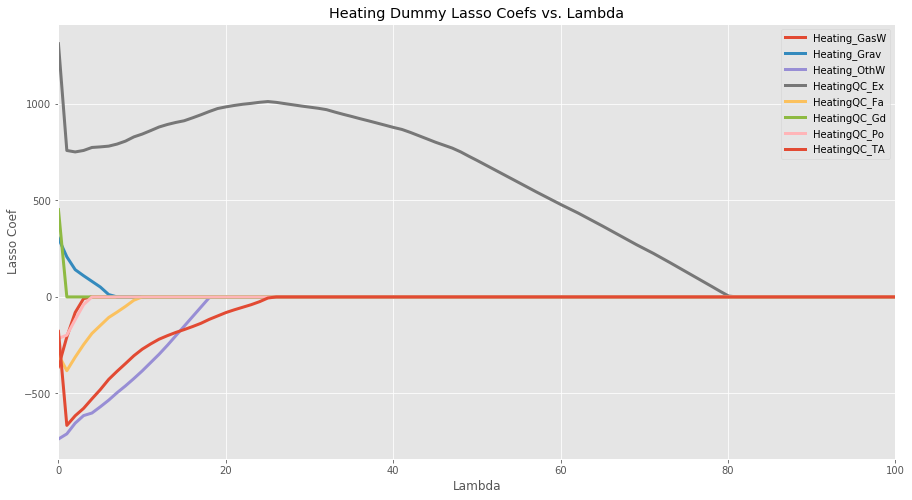

In [496]:
Heating_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Heating_GasW'):\
                                                list(coefs_lasso.columns).index('HeatingQC_TA')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Heating_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Heating_dummies[i],data = coefs_lasso,label = Heating_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Heating Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

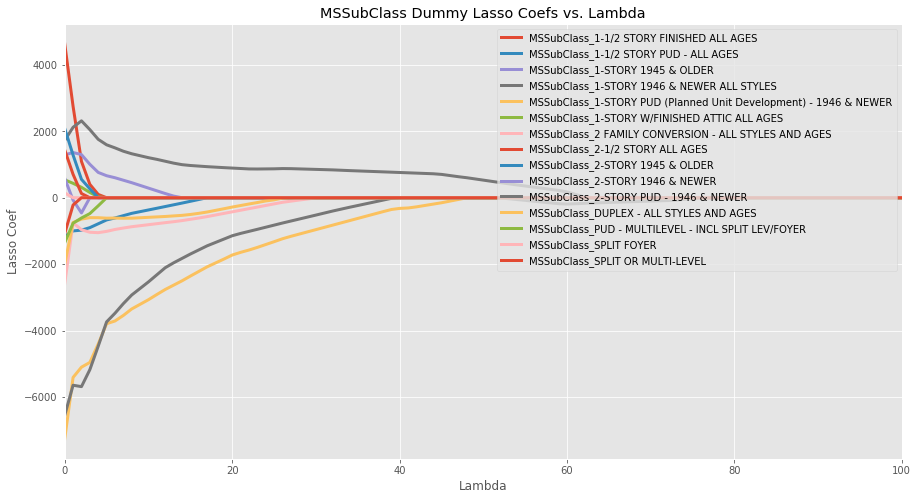

In [498]:
MSSubClass_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('MSSubClass_1-1/2 STORY FINISHED ALL AGES'):\
                                                list(coefs_lasso.columns).index('MSSubClass_SPLIT OR MULTI-LEVEL')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(MSSubClass_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = MSSubClass_dummies[i],data = coefs_lasso,label = MSSubClass_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("MSSubClass Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend(loc = 1)
plt.show()

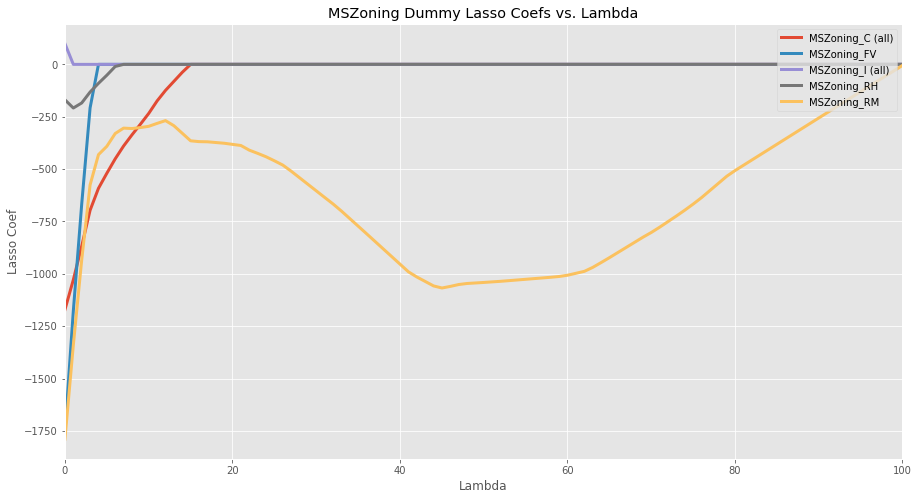

In [490]:
MSZoning_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('MSZoning_C (all)'):\
                                                list(coefs_lasso.columns).index('MSZoning_RM')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(MSZoning_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = MSZoning_dummies[i],data = coefs_lasso,label = MSZoning_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("MSZoning Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend(loc = 1)
plt.show()

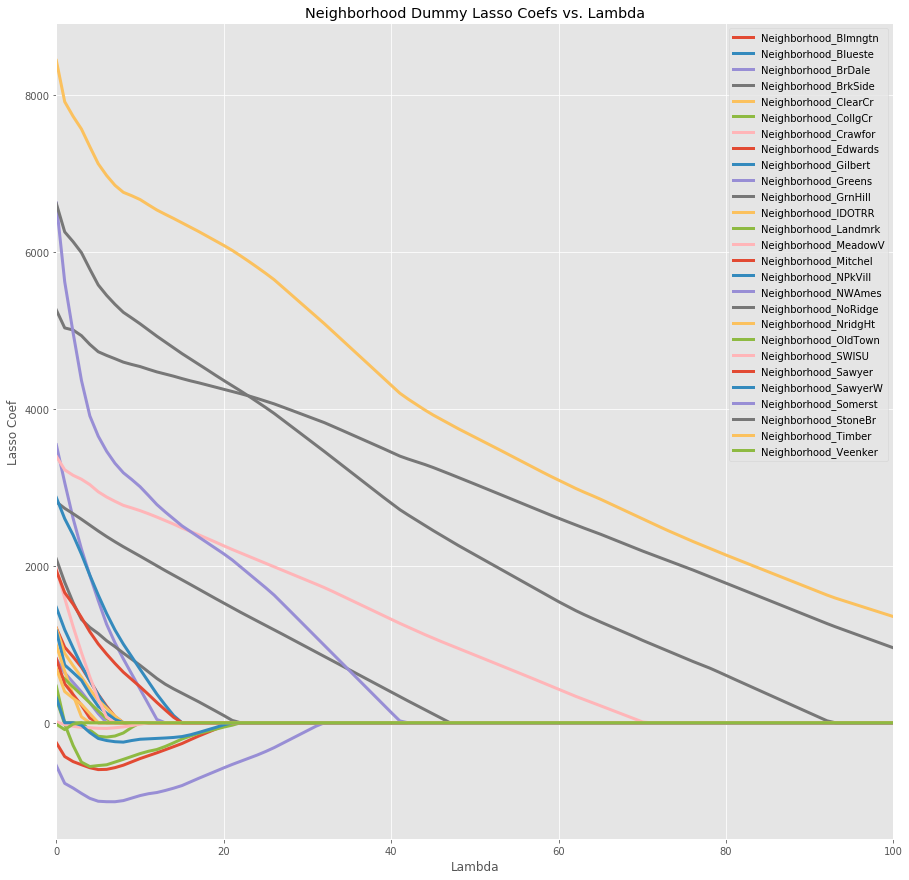

In [491]:
Neighborhood_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Neighborhood_Blmngtn'):\
                                                list(coefs_lasso.columns).index('Neighborhood_Veenker')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,15)

for i in range(len(Neighborhood_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Neighborhood_dummies[i],data = coefs_lasso,label = Neighborhood_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Neighborhood Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

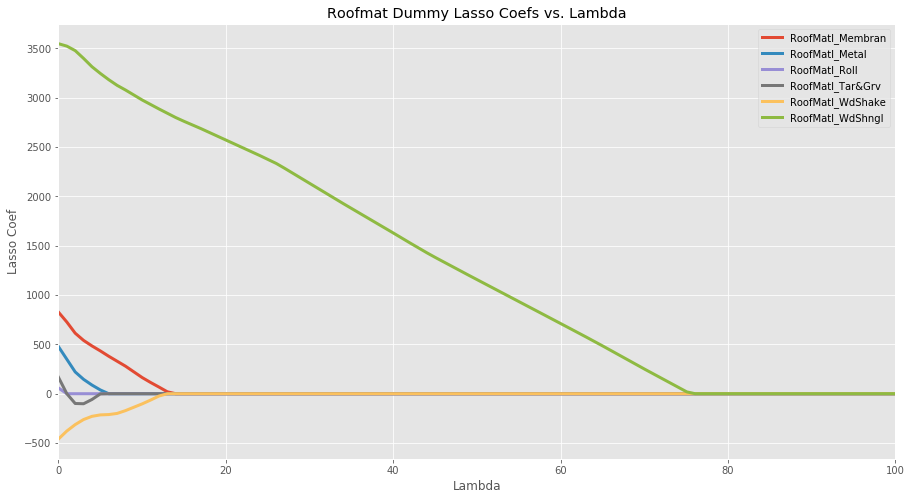

In [502]:
Roofmat_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('RoofMatl_Membran'):\
                                                list(coefs_lasso.columns).index('RoofMatl_WdShngl')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Roofmat_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Roofmat_dummies[i],data = coefs_lasso,label = Roofmat_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Roofmat Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

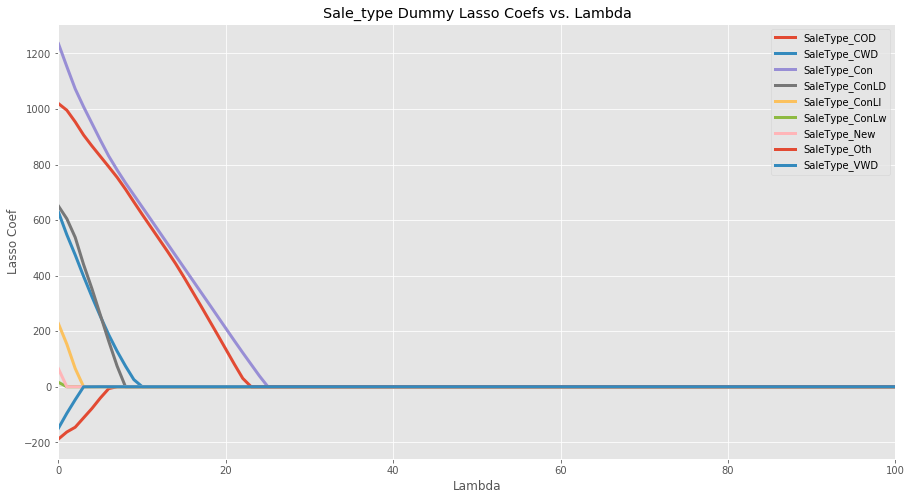

In [505]:
Sale_type_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('SaleType_COD'):\
                                                list(coefs_lasso.columns).index('SaleType_VWD')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Sale_type_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Sale_type_dummies[i],data = coefs_lasso,label = Sale_type_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Sale_type Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

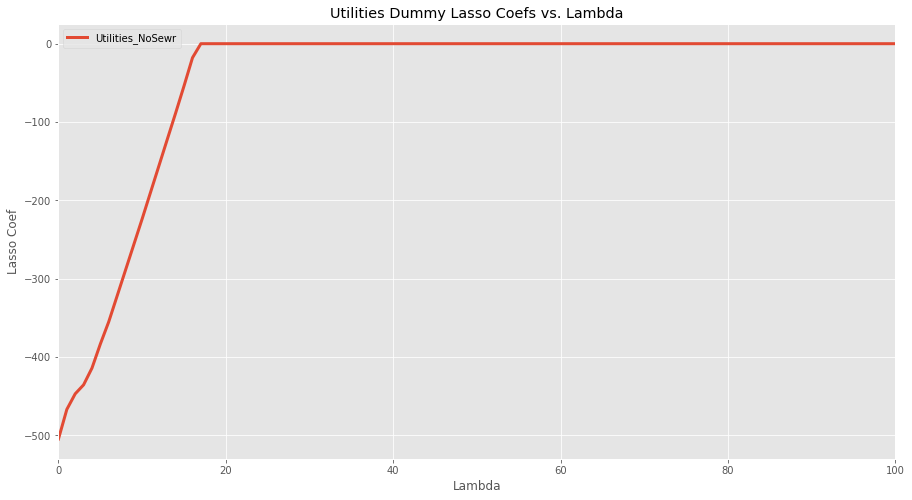

In [510]:
Utilities_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Utilities_NoSewr')]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

sns.lineplot(x = coefs_lasso.index,y = 'Utilities_NoSewr',data = coefs_lasso,label = 'Utilities_NoSewr',linewidth = 3)

plt.xlim(0,100)
plt.title("Utilities Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()